# Avacado Project
Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/arjun0200/Datasets/main/avocado.csv')

# Data Analysis

In [3]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
df.head(5)

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [4]:
df.tail(5)

Unnamed: 0        Date  AveragePrice  Total Volume     4046     4225  \
18244           7  2018-02-04          1.63      17074.83  2046.96  1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70  3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92  2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63  2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77  2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    0.00    13498.67    13066.82      431.85          0.0  organic  2018   
18245    0.00     9264.84     8940.04      324.80          0.0  organic  2018   
18246  727.94     9394.11     9351.80       42.31          0.0  organic  2018   
18247  727.01    10969.54    10919.54       50.00          0.0  organic  2018   
18248  224.53    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

In [5]:
df.sample(5)

Unnamed: 0        Date  AveragePrice  Total Volume      4046      4225  \
11835           5  2015-11-22          1.29     223979.09  28451.14  77160.23   
5373           17  2016-08-28          1.38      71711.83   5939.38  45349.71   
12168          27  2016-06-19          1.53      11590.31      1.21    588.73   
17861           8  2018-01-28          1.78       8672.12   1005.73   2110.22   
3344           16  2016-09-04          1.06     161362.24  73011.64  29161.53   

          4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
11835   123.89   118243.83     2251.17   115992.66         0.00       organic   
5373     16.10    20406.64    19306.64        0.00      1100.00  conventional   
12168     0.00    11000.37     9667.80     1332.57         0.00       organic   
17861     0.00     5556.17     5538.46       17.71         0.00       organic   
3344   2616.16    56572.91    55935.18      466.29       171.44  conventional   

       year    region  
11835  2015      West  
5373   2016  Syracuse  
12168  2016    Boston  
17861  2018  LasVegas  
3344   2016  Columbus

In [6]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
df.shape

(18249, 14)

Checking some more dataset rows for better understandings.

In [8]:
df.sample(50)

Unnamed: 0        Date  AveragePrice  Total Volume         4046  \
16704           2  2017-12-17          2.03      10729.32        77.21   
8986            4  2018-02-25          1.17     984000.13    383689.73   
9853           51  2015-01-04          1.70       7446.43       361.76   
5233           33  2016-05-08          0.86    4651540.06   2196754.82   
12772           7  2016-11-06          1.90       5678.73       161.06   
6194           48  2017-01-29          1.06     163084.68     66807.47   
905            21  2015-08-02          1.16     323449.77      4543.97   
8559            9  2018-01-21          1.12    6610010.64   2378177.09   
4823           39  2016-03-27          1.02     233604.10     61031.43   
5466            6  2016-11-13          1.36   24075126.49   8235135.43   
12828          11  2016-10-09          2.34       6836.11        48.42   
3706           14  2016-09-18          1.51     233869.17     37691.02   
5729            7  2017-11-12          1.49     658693.00     78052.00   
1396           44  2015-02-22          1.05     148164.20    101095.06   
11333          23  2015-07-19          2.36      19558.81      3893.65   
16549           6  2017-11-19          1.44      10579.74      1176.50   
4088           32  2016-05-15          0.88     889357.25    408466.47   
11895          13  2015-09-20          2.19       5023.44       896.41   
7204           51  2017-01-08          1.25    4691937.50    203756.33   
11114          12  2015-10-04          1.68       4466.07        58.49   
11847          17  2015-08-30          1.54     220337.30     50269.47   
1539           31  2015-05-24          1.26    4661457.29    112425.95   
2530           34  2015-05-03          1.09     275080.92    190986.18   
15271           0  2017-12-31          1.14      15852.37       446.28   
14311          38  2016-04-03          1.22      86545.27     28336.55   
167            11  2015-10-11          0.94      80904.19     26114.19   
5040           48  2016-01-24          1.05     844417.47    115036.60   
2037            9  2015-10-25          0.99     110896.48     57250.89   
4384           16  2016-09-04          1.38     374902.91     83711.04   
663            39  2015-03-29          1.11     627546.30    160679.31   
12507           2  2016-12-11          1.14      20619.42      4812.83   
4271            7  2016-11-06          1.93     767190.62     10277.48   
8627            5  2018-02-18          1.16     743979.81    159850.99   
17175          49  2017-01-22          1.02     147163.14     28151.07   
2916            4  2016-11-27          1.49     539924.84     46243.14   
4709           29  2016-06-05          0.78     942774.69    153775.40   
3525           41  2016-03-13          1.12     299527.55     82406.98   
2599           51  2015-01-04          1.33      41143.51      2506.61   
14313          40  2016-03-20          1.23      79411.38     27908.44   
9982           24  2015-07-12          1.92       1267.44       124.64   
7210            4  2017-12-03          1.10     636106.00     15373.00   
11231          25  2015-07-05          1.86       9756.10      4437.96   
9824           22  2015-07-26          1.28      12186.97       562.63   
5206            6  2016-11-13          1.37    2819888.75   1219549.43   
17679           6  2018-02-11          1.85     168311.26     30354.00   
9092            2  2018-03-11          1.09   40449603.12  14089091.05   
10303          33  2015-05-10          1.39      42131.80     12338.35   
2572           24  2015-07-12          1.25      75144.87       577.45   
14747           6  2017-11-19          1.75       2506.38         0.00   
2459           15  2015-09-13          1.03      78771.30     39572.15   

              4225       4770   Total Bags   Small Bags  Large Bags  \
16704      4392.70     150.91      6108.50      5862.83      245.67   
8986     431346.38    2127.86    166836.16    162913.33      609.20   
9853       5025.58 

In [9]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

#### Also column Unnamed: 0 does not having any valuable information regarding dataset. Hence we can drop it.

In [10]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [11]:
df.drop(['Unnamed: 0'], inplace = True, axis = 1)

In [12]:
print(df.shape)

(18249, 13)


In [13]:
df.sample(5)

Date  AveragePrice  Total Volume       4046        4225  \
7043   2017-01-22          0.87     251189.52  112820.57    30481.58   
11352  2015-03-08          1.56      20111.30   12933.84     7159.00   
5842   2017-09-24          1.62     498019.71   10697.54   384522.40   
17420  2017-06-11          1.86       4577.12     933.06      206.39   
3638   2016-01-10          1.06    3310201.06  503914.83  1753942.06   

            4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
7043       81.46   107805.91    82914.32    24413.26       478.33   
11352       0.00       18.46       18.46        0.00         0.00   
5842     1718.59   101081.18    67635.26    33422.59        23.33   
17420       0.00     3437.67     3434.34        3.33         0.00   
3638   352247.15   700097.02   488806.30   185907.38     25383.34   

               type  year        region  
7043   conventional  2017     Nashville  
11352       organic  2015  SanFrancisco  
5842   conventional  2017        Boston  
17420       organic  2017         Tampa  
3638   conventional  2016    GreatLakes

<AxesSubplot:>

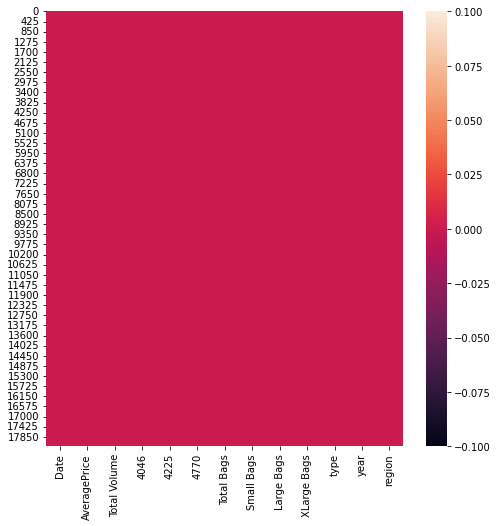

In [14]:
plt.figure(figsize = (8,8))
sns.heatmap(df.isnull())

In [15]:
df.shape

(18249, 13)

In [16]:
df.sample(5)

Date  AveragePrice  Total Volume        4046        4225  \
8157   2017-01-15          0.93     107376.76    15011.06    31840.57   
3423   2016-02-28          0.74    1199630.68   717451.54   207475.39   
5175   2016-06-19          0.89    6005535.29  3271758.23  1118582.85   
2712   2015-11-01          0.90    5024858.14  1815066.15  1937479.91   
12997  2016-07-10          1.68       3843.30     1452.19       79.88   

            4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
8157      438.94    60086.19    58001.90     2063.92        20.37   
3423    53555.69   221148.06   202051.47    19078.77        17.82   
5175   346244.07  1268950.14  1062854.49   167590.92     38504.73   
2712   132883.59  1139428.49   717110.41   421675.08       643.00   
12997       8.35     2302.88     2302.88        0.00         0.00   

               type  year         region  
8157   conventional  2017        Spokane  
3423   conventional  2016  DallasFtWorth  
5175   conventional  2016   SouthCentral  
2712   conventional  2015           West  
12997       organic  2016   Jacksonville

In [17]:
df.info()  # checking basic summary of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [18]:
df.describe()  # checking description of the dataset

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000  
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899  
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000  
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000  
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000  
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000  
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000

<AxesSubplot:>

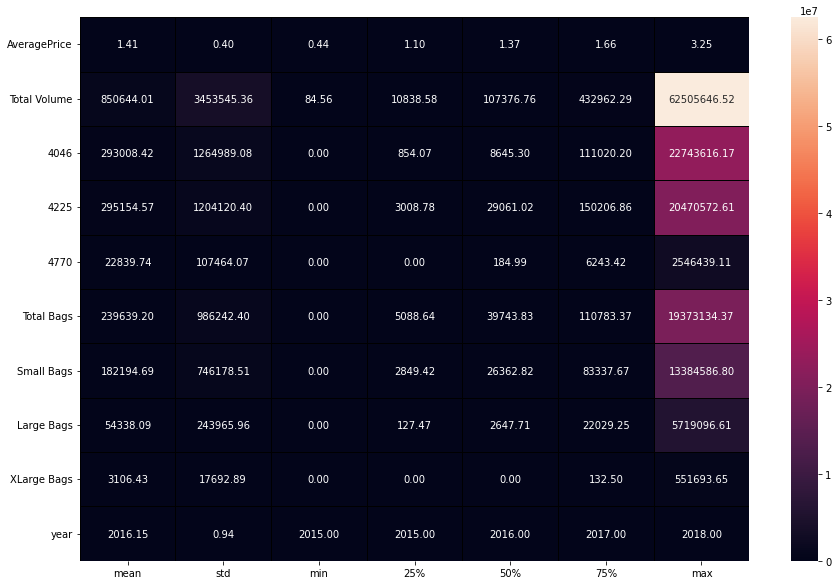

In [19]:
plt.figure(figsize = (15,10))
sns.heatmap(df.describe()[1:].transpose(), annot = True, linecolor='black', linewidths=0.5, fmt = '.2f')

#checking description visually

#### Total volume, 4046, 4225, Total Bags, Small Bags, Large Bags, XLarge Bags probably having outlier.

In [20]:
df.dtypes  # checking datatypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [21]:
df['Date'] = pd.to_datetime(df['Date'])

In [22]:
df.dtypes  # checking datatypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

### As we know that every fruit having a season hence we need to split Date to Month and Year

In [23]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [24]:
df.sample(5)

Date  AveragePrice  Total Volume      4046      4225     4770  \
13593 2016-01-24          1.59       4767.81   2300.07     57.74     0.00   
10095 2015-05-10          1.28      10725.46   9355.66    449.80     0.00   
2595  2015-02-01          1.26      57424.15   1321.47  30243.88    14.24   
8246  2017-05-14          1.66      74951.66   1032.62  43170.45    42.00   
2967  2016-12-04          1.01      72471.63  34194.72   2996.30  3771.85   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
13593     2410.00     2410.00        0.00         0.00       organic  2016   
10095      920.00      920.00        0.00         0.00       organic  2015   
2595     25844.56    25793.45       51.11         0.00  conventional  2015   
8246     30706.59    28525.65     2180.94         0.00  conventional  2017   
2967     31508.76    31278.13      217.75        12.88  conventional  2016   

         region  Month  Year  
13593   Orlando      1  2016  
10095   Houston      5  2015  
2595   Syracuse      2  2015  
8246   Syracuse      5  2017  
2967      Boise     12  2016

### Checking Year and year columns both are equal or not

In [25]:
df['year'].equals(df['Year'])  # both are equal

True

### As per above code we find that 'year' and 'Year' are same hence we can drop one of them. And from Date we already take important information hence we can drop it too.

In [26]:
df.drop(['year','Date'], inplace = True, axis = 1)

In [27]:
df.sample(2)

AveragePrice  Total Volume       4046       4225      4770  Total Bags  \
6844          1.23     102915.21    3751.03   44115.78     56.48    54991.92   
5015          1.46     804071.94  200748.22  481290.68  43042.94    78990.10   

      Small Bags  Large Bags  XLarge Bags          type        region  Month  \
6844    13041.14    41950.78         0.00  conventional    Louisville     10   
5015    77461.44      106.44      1422.22  conventional  SanFrancisco      7   

      Year  
6844  2017  
5015  2016

In [28]:
df['Month'] = df['Month'].astype('object') # converting month into object for better understanding of ml

In [29]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
region           object
Month            object
Year              int64
dtype: object

In [30]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'region', 'Month',
       'Year'],
      dtype='object')

#### Rearranging columns dataset for better understanding how different variable effects on target variable

In [31]:
df = df[['Month','Year','Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'region','AveragePrice']]

In [32]:
df.head(2)

Month  Year  Total Volume     4046      4225   4770  Total Bags  Small Bags  \
0    12  2015      64236.62  1036.74  54454.85  48.16     8696.87     8603.62   
1    12  2015      54876.98   674.28  44638.81  58.33     9505.56     9408.07   

   Large Bags  XLarge Bags          type  region  AveragePrice  
0       93.25          0.0  conventional  Albany          1.33  
1       97.49          0.0  conventional  Albany          1.35

In [33]:
df_object = df.select_dtypes(include = 'object').columns

In [34]:
df_int = df.select_dtypes(include = 'int').columns

In [35]:
df_continuos = df.select_dtypes(include = 'float').columns

In [36]:
for i in df_object:
    print(i, df[i].unique(), '\n')

Month [12 11 10 9 8 7 6 5 4 3 2 1] 

type ['conventional' 'organic'] 

region ['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico'] 



# Exploratory Data Analysis

## For Object Dataset

# Univariate Analysis and with respect to Target Variable

## Avacado type

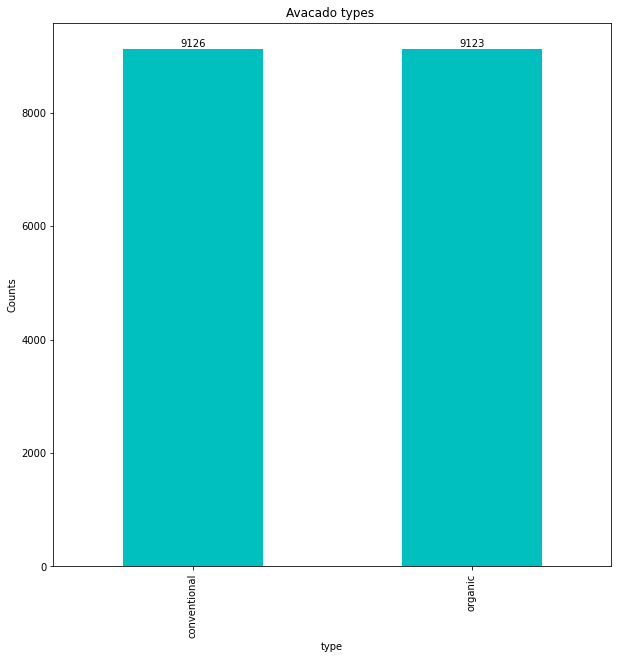

In [37]:
type = df.type.value_counts()
plt.figure(figsize = (10,10))
df_type = type.plot(kind = 'bar', color = 'c')
df_type.set_title('Avacado types ')
df_type.set_xlabel('type')
df_type.set_ylabel('Counts')


for i in df_type.containers:
    df_type.bar_label(i)

#### From above code we find that 9126 are of conventional types and rest 8662 are of organic types avacado.

## Percentage of Avacado type

<AxesSubplot:ylabel='type'>

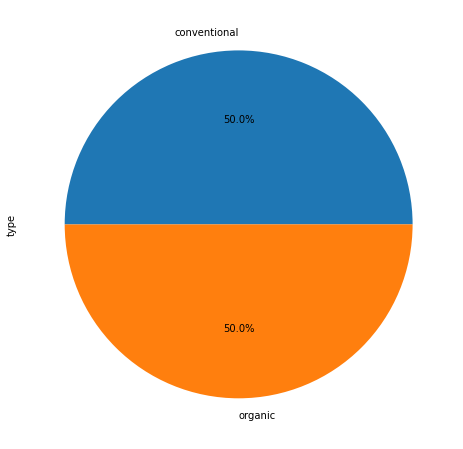

In [38]:
plt.figure(figsize = (8,8))
type.plot(kind = 'pie', autopct = '%1.1f%%')

#### From above code we find that 51.3 ratio are of conventional types and rest 48.7 ratio are of organic types avacado.

## Checking Avacado type with respect to Target variable AveragePrice

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

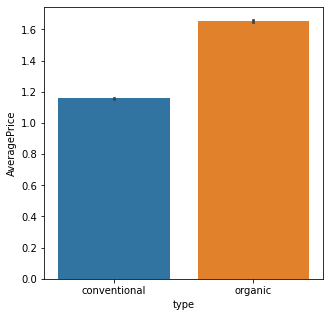

In [39]:
plt.figure(figsize = (5,5))
sns.barplot(x = 'type', y = 'AveragePrice', data = df)

### Observations: Conventional avacado prices are in the range of 0 to 1.2 approx while organic avacado price are in the range of 0 to 1.8 approx.

#### 

# Avacado Region

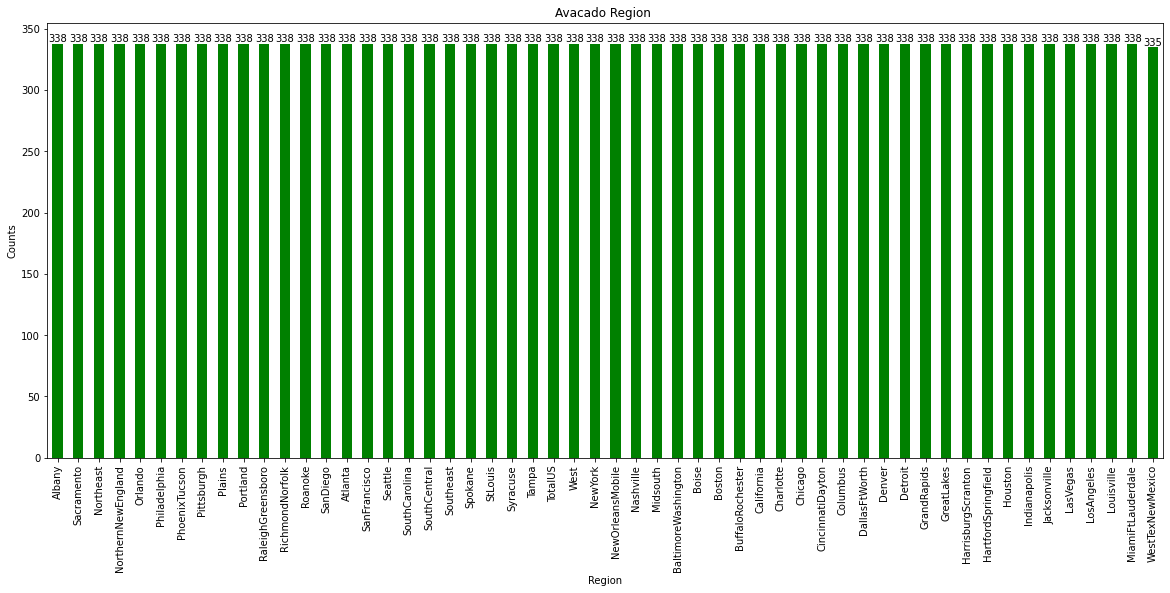

In [40]:
Region = df.region.value_counts()
plt.figure(figsize = (20,8))
df_Region = Region.plot(kind = 'bar', color = 'g')
df_Region.set_title('Avacado Region ')
df_Region.set_xlabel('Region')
df_Region.set_ylabel('Counts')


for i in df_Region.containers:
    df_Region.bar_label(i)

### Observations:

In [41]:
# # Region           Avacado Points
# Albany                 338
# Sacramento             338
# Northeast              338
# NorthernNewEngland     338
# Orlando                338
# Philadelphia           338
# PhoenixTucson          338
# Pittsburgh             338
# Plains                 338
# Portland               338
# RaleighGreensboro      338
# RichmondNorfolk        338
# Roanoke                338
# SanDiego               338
# Atlanta                338
# SanFrancisco           338
# Seattle                338
# SouthCarolina          338
# SouthCentral           338
# Southeast              338
# Spokane                338
# StLouis                338
# Syracuse               338
# Tampa                  338
# TotalUS                338
# West                   338
# NewYork                338
# NewOrleansMobile       338
# Nashville              338
# Midsouth               338
# BaltimoreWashington    338
# Boise                  338
# Boston                 338
# BuffaloRochester       338
# California             338
# Charlotte              338
# Chicago                338
# CincinnatiDayton       338
# Columbus               338
# DallasFtWorth          338
# Denver                 338
# Detroit                338
# GrandRapids            338
# GreatLakes             338
# HarrisburgScranton     338
# HartfordSpringfield    338
# Houston                338
# Indianapolis           338
# Jacksonville           338
# LasVegas               338
# LosAngeles             338
# Louisville             338
# MiamiFtLauderdale      338
# WestTexNewMexico       335

# * Lesser selling in Syracuse

## Percentage of Avacado Regions

<AxesSubplot:ylabel='region'>

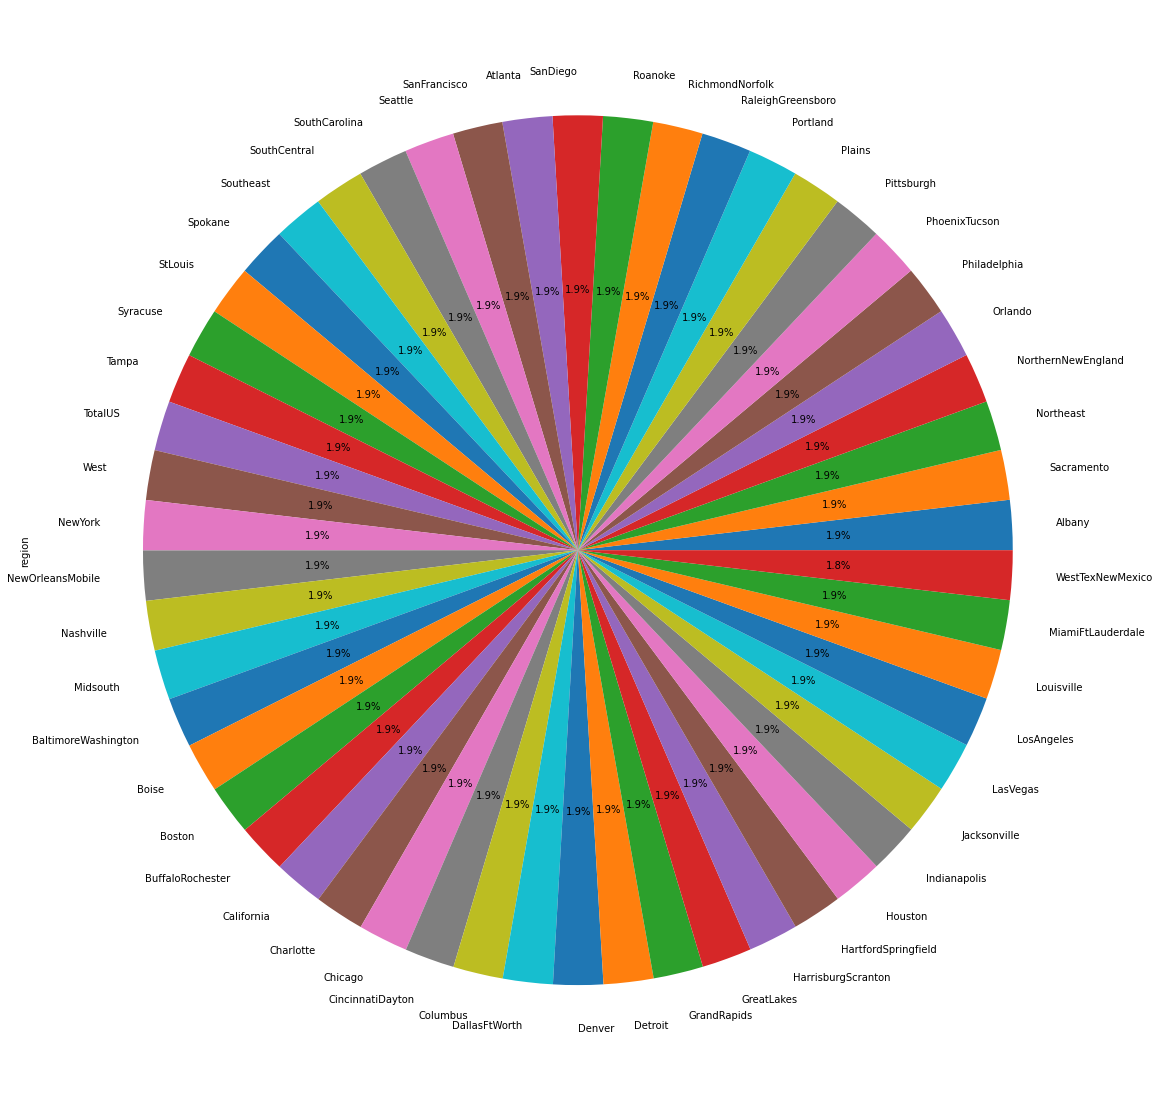

In [42]:
plt.figure(figsize = (20,20))
Region.plot(kind = 'pie', autopct = '%1.1f%%')

### Most of the region sales avacado in the ratio of 1.9 while only WestTexNewMexico sales avacado with lesser ratio of 1.8.

#### 

## Checking Avacado Region with respect to Target variable AveragePrice

<AxesSubplot:xlabel='AveragePrice', ylabel='region'>

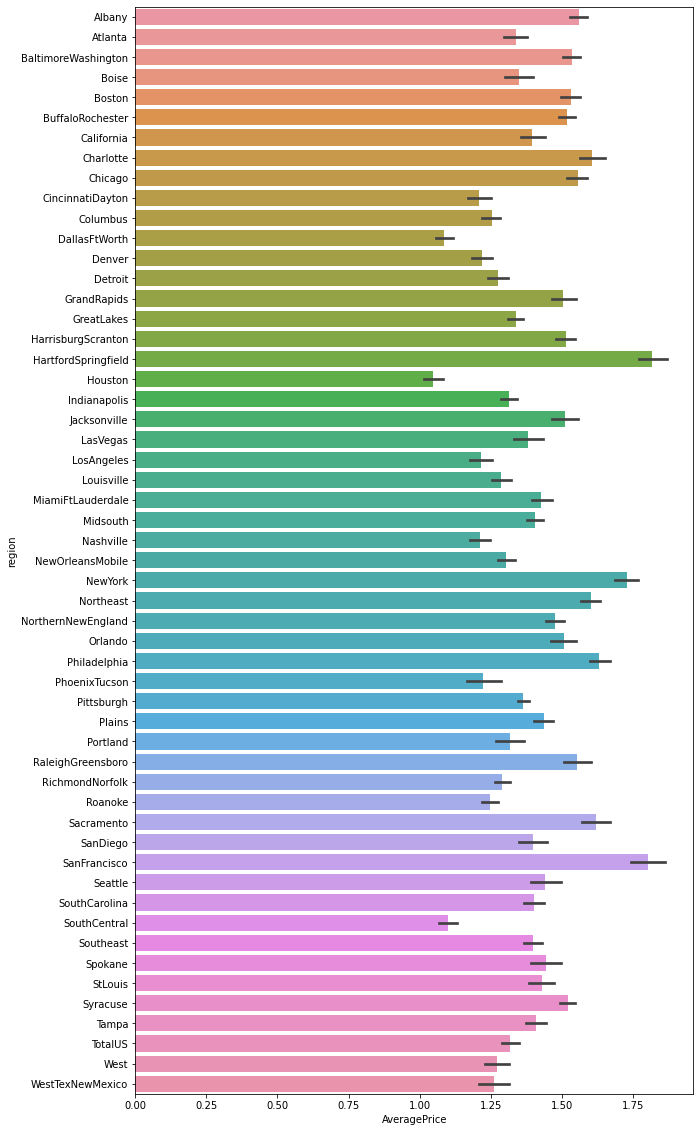

In [43]:
plt.figure(figsize = (10,20))
sns.barplot(x = 'AveragePrice', y = 'region', data = df, orient = 'h')

#### Most of the regions avacado price lies in the range of price 1.25 to 1.70 approx only two region sales avacado in high price which are Sandiego and HarrisburgScranton. 

## Checking Year effect on Average Price of Avacados

### Line Plot

<AxesSubplot:xlabel='Year', ylabel='AveragePrice'>

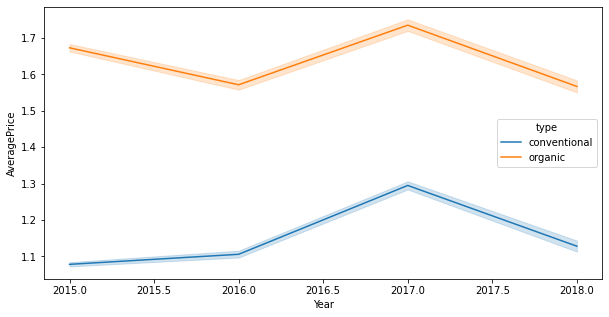

In [44]:
plt.figure(figsize = (10,5))
sns.lineplot(x = 'Year', y = 'AveragePrice', hue = 'type', data = df)

### Observations: We find that Organic Avacados having average price in range of 1.5 to 2.0 while conventional selling avg price are in range of 1 to 1.4 approx. Also in the year 2017 the sales are drastically increases.

## Avacado Sales on different Years

### Bar Plot

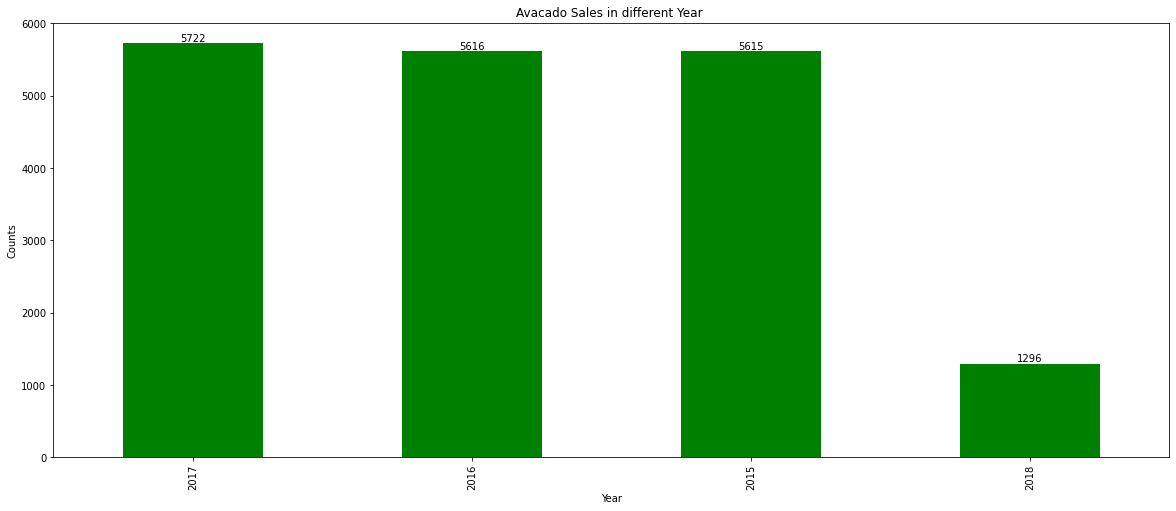

In [45]:
Year = df.Year.value_counts()
plt.figure(figsize = (20,8))
df_Year = Year.plot(kind = 'bar', color = 'g')
df_Year.set_title('Avacado Sales in different Year ')
df_Year.set_xlabel('Year')
df_Year.set_ylabel('Counts')


for i in df_Year.containers:
    df_Year.bar_label(i)

#### Observations

In [46]:
# Year  Selling Counts
# 2017    5722
# 2016    5616
# 2015    5615
# 2018    1296

# In the year 2017 avacado sells higher while in year 2018 only 1296 avacados sells.

### Percentage of Avacado Sales on different Years

<AxesSubplot:ylabel='Year'>

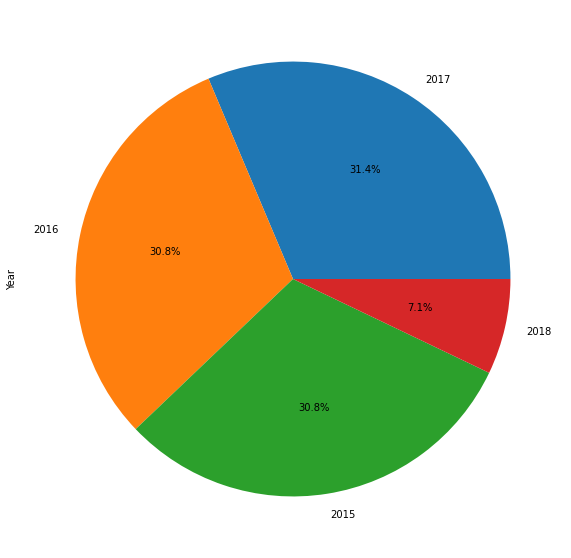

In [47]:
plt.figure(figsize = (10,10))
Year.plot(kind = 'pie', autopct = '%1.1f%%')

#### In the year 2017 avacado sells higher in the ratio of 31.4 while in year 2018 only 7.1 ratio of avacados sells.

# Checking Month effect on Average Price of Avacados

### Line Plot

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

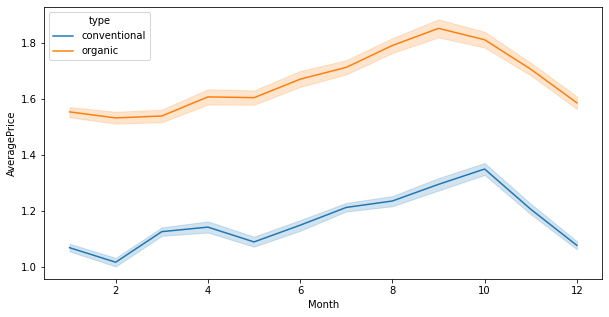

In [48]:
plt.figure(figsize = (10,5))
sns.lineplot(x = 'Month', y = 'AveragePrice', hue = 'type', data = df)

### Observations: In the month of July to November the sales are drastically increases. We find that Organic Avacados having average price in range of 1.5 to 2.0 while conventional selling avg price are in range of 1 to 1.4 approx.

## Avacado Sales on different Months

#### Bar Plot

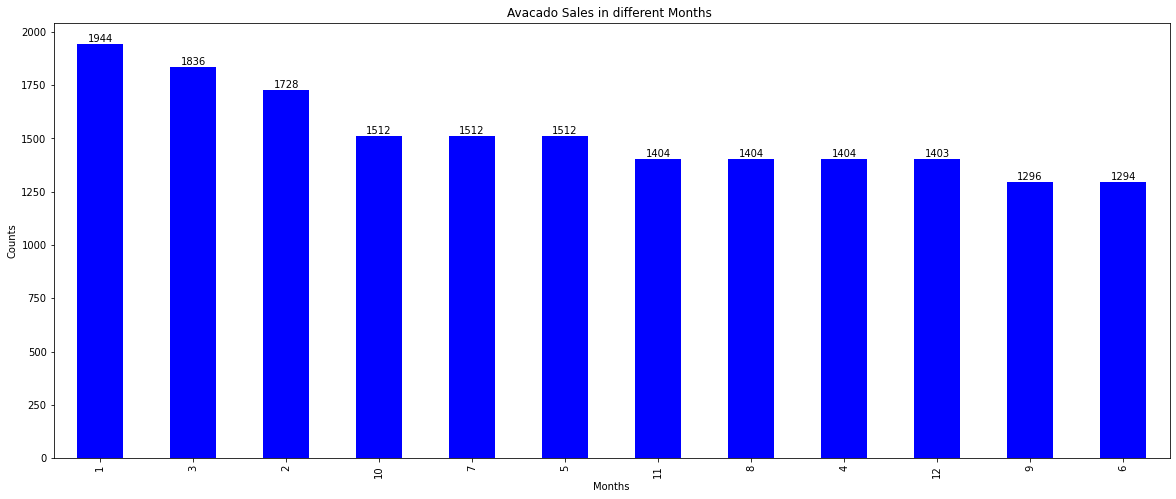

In [49]:
Month = df.Month.value_counts()
plt.figure(figsize = (20,8))
df_Month = Month.plot(kind = 'bar', color = 'b')
df_Month.set_title('Avacado Sales in different Months ')
df_Month.set_xlabel('Months')
df_Month.set_ylabel('Counts')


for i in df_Month.containers:
    df_Month.bar_label(i)

### Observations: 

In [50]:
# Months Sells
# 1     1944
# 3     1836
# 2     1728
# 10    1512
# 7     1512
# 5     1512
# 11    1404
# 8     1404
# 4     1404
# 12    1403
# 9     1296
# 6     1294

# Highest sell of avacados in Jan month and least sell in June.

## Percentage of Avacado Sales on different Months

<AxesSubplot:ylabel='Month'>

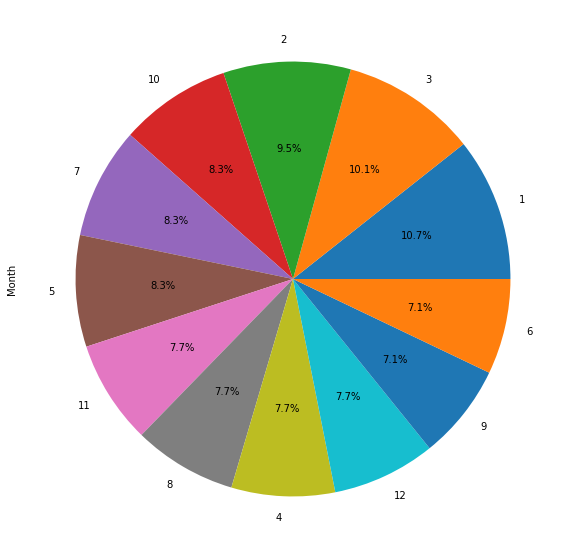

In [51]:
plt.figure(figsize = (10,10))
Month.plot(kind = 'pie', autopct = '%1.1f%%')

#### Only in two month Avacado sells goes beyond 10 percent which are January and March rest month avacado sells less than 10 percent.

# Checking Visualization for Continuos Values

# Scatter Plot

In [52]:
df_continuos

Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'AveragePrice'],
      dtype='object')

## Total Volume effects on Average Price 

<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

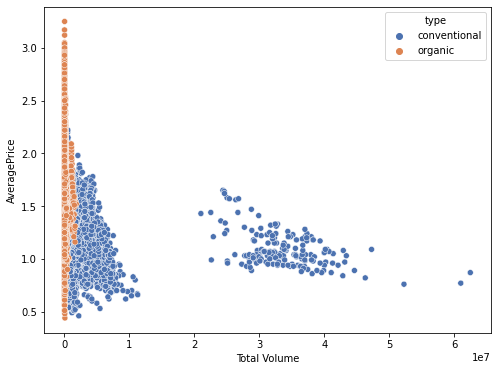

In [53]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'Total Volume', y = 'AveragePrice',hue = 'type', palette = "deep", data = df )

#### As per above graph Total Volume are divided in two part with average price, with price range 1.0 to 1.7 approx are lies in 2 to 5 Volume. Rest are in the range of 0 to 1.2 approx total volume.

## 4046 Effects on Average Price

<AxesSubplot:xlabel='4046', ylabel='AveragePrice'>

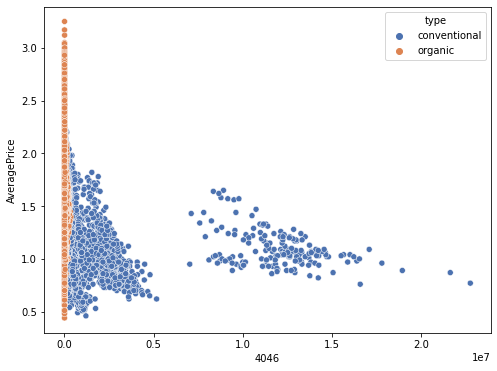

In [54]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = '4046', y = 'AveragePrice', data = df, hue = 'type', palette = "deep")

#### Organic price are in range of 0 to 3.0 while conventional avacados divided in two parts one in range of 0 to 0.5 approx and rest in range of 0.7 to 1.9 with some outliers.

## 4225 Effects on Average Price

In [55]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = '4225', y = 'AveragePrice', data = df, hue = 'type', palette = "deep")

<AxesSubplot:xlabel='4225', ylabel='AveragePrice'>

#### Organic price are in range of 0 to 3.5 while conventional avacados divided in two parts one in range of 0 to 0.5 approx and rest in range of 0.7 to 1.4 with some outliers and having price range 0.5 to 2.2 approx.

## 4770 Effects on Average Price

<AxesSubplot:xlabel='4770', ylabel='AveragePrice'>

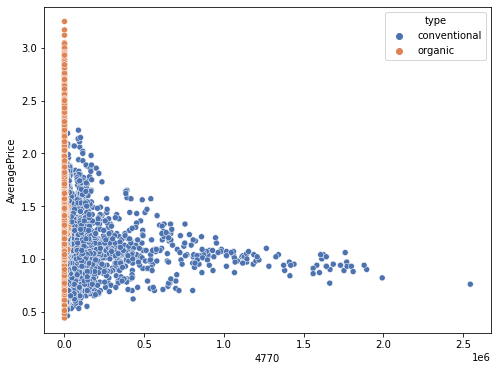

In [56]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = '4770', y = 'AveragePrice', data = df, hue = 'type', palette = "deep")

#### Organic price are in range of 0 to 3.5 while conventional avacados in range of 0 to 2.0 approx with some outliers and having price range 0.4 to 2.2 approx.

## Total Bags Effects on Average Price

In [57]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'Total Bags', y = 'AveragePrice', data = df, hue = 'type', palette = "deep")

<AxesSubplot:xlabel='Total Bags', ylabel='AveragePrice'>

#### Organic price are in range of 0 to 3.5 while conventional avacados Total Bags in range of 0 to 1.65 approx with some outliers and having price range 0.4 to 2.0 approx.

## Small Bags Effects on Average Price

<AxesSubplot:xlabel='Small Bags', ylabel='AveragePrice'>

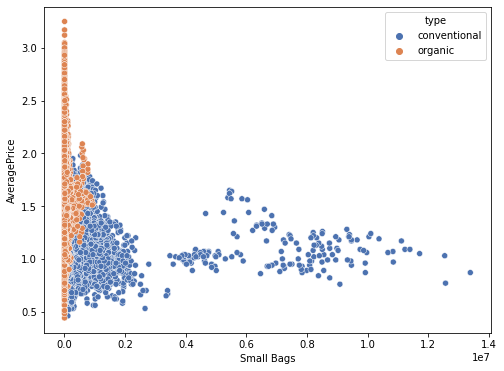

In [58]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'Small Bags', y = 'AveragePrice', data = df, hue = 'type', palette = "deep")

#### Small Bags in the case of convention avacados scatter in two range of 0.0 to 0.3 and 0.3 two to 1.5 while organic are in usual phase as per graph.

## Large Bags Effects on Average Price

<AxesSubplot:xlabel='Large Bags', ylabel='AveragePrice'>

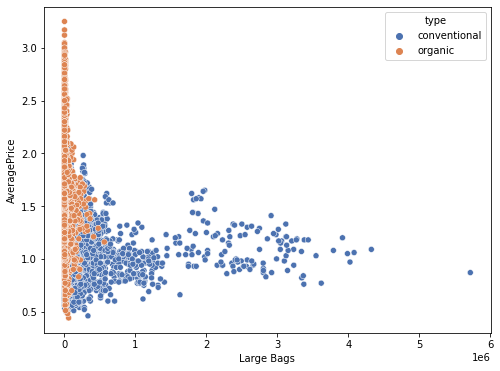

In [59]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'Large Bags', y = 'AveragePrice',hue = 'type', palette = "deep", data = df )

#### Organic price are in range of 0 to 3.5 while conventional avacados in price range of 0 to 2.0 approx with some outliers and having Large Bags range 0 to 4.0 approx.

## XLarge Bags Effects on Average Price

In [60]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'XLarge Bags', y = 'AveragePrice',hue = 'type', palette = "deep", data = df )

<AxesSubplot:xlabel='XLarge Bags', ylabel='AveragePrice'>

#### Organic price are in range of 0 to 3.5 while conventional avacados in price range of 0 to 2.0 approx with some outliers and having Large Bags range 0 to 20000 approx.¶

## Bivariate Analysis with respect to each continuos dataset columns

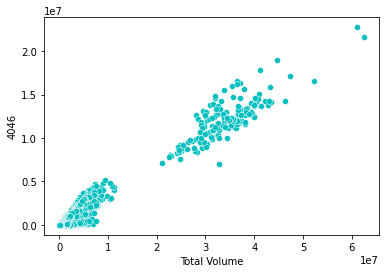

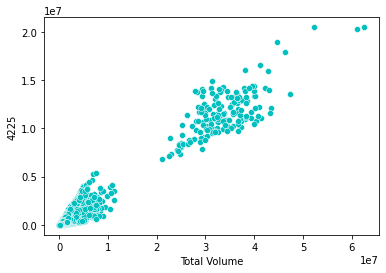

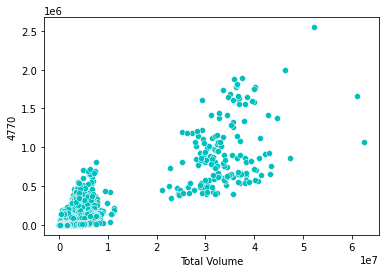

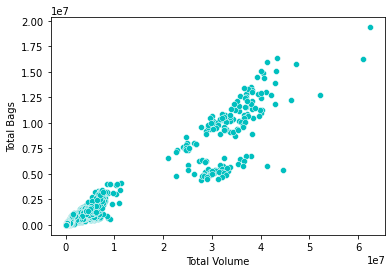

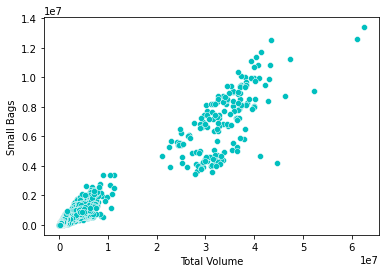

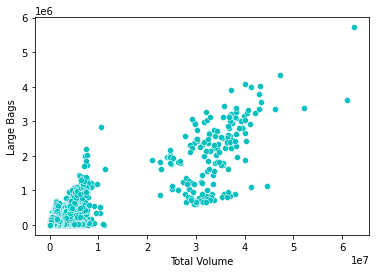

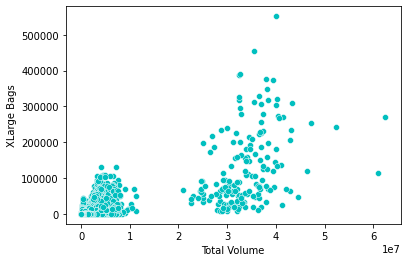

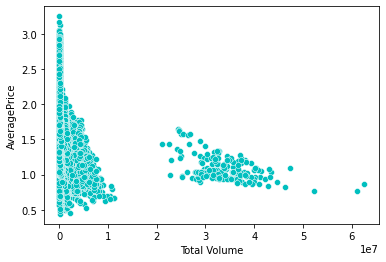

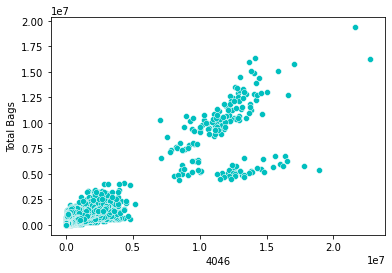

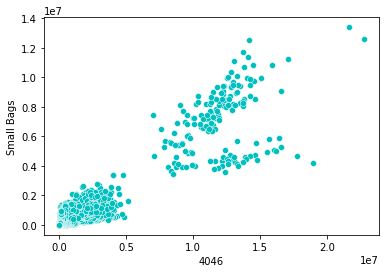

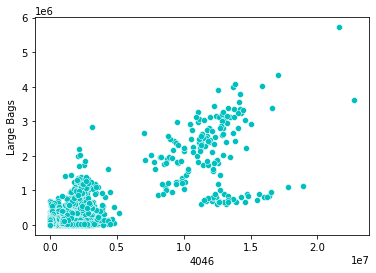

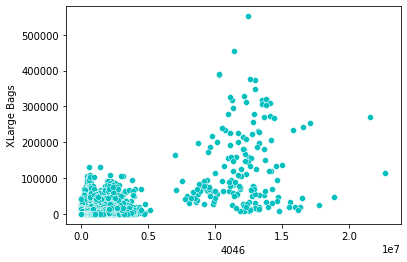

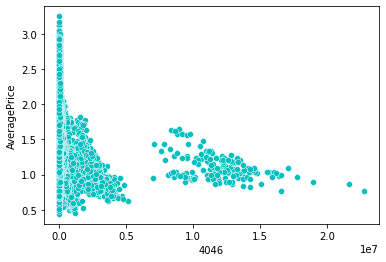

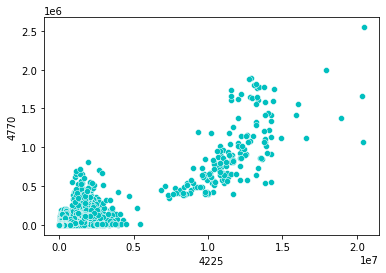

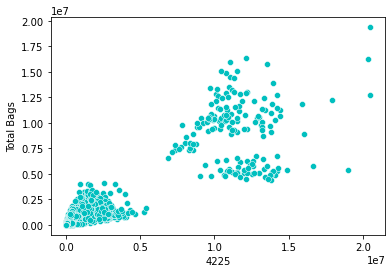

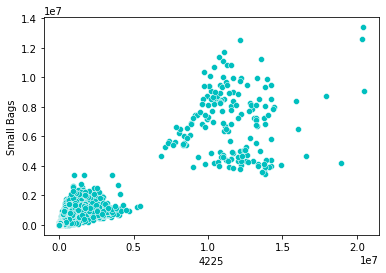

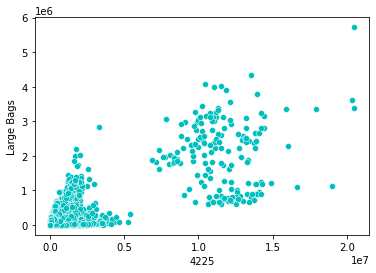

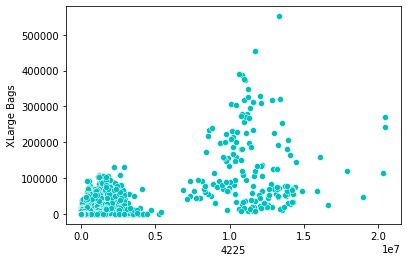

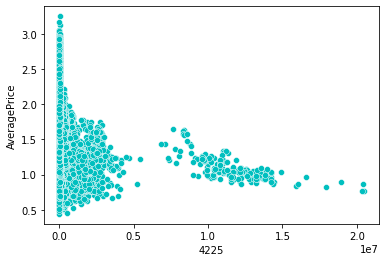

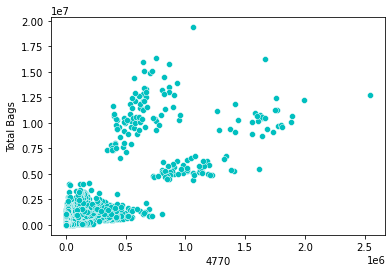

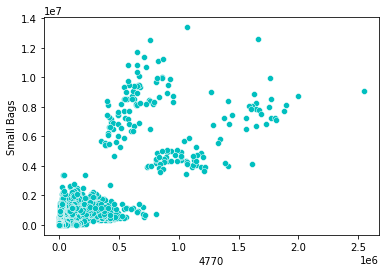

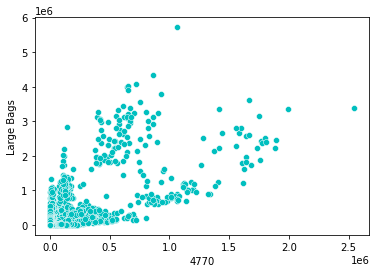

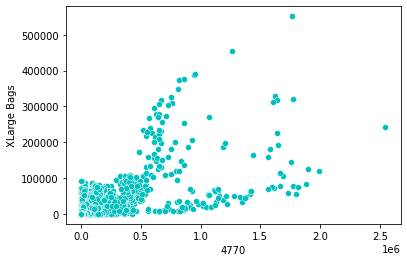

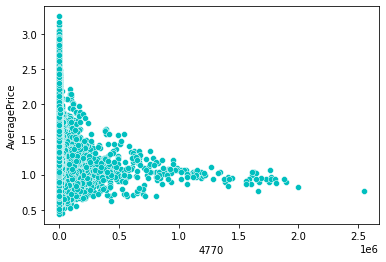

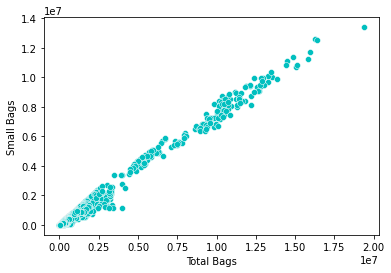

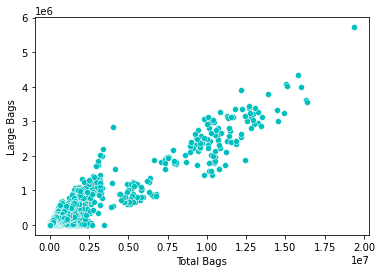

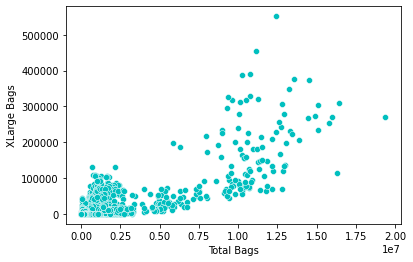

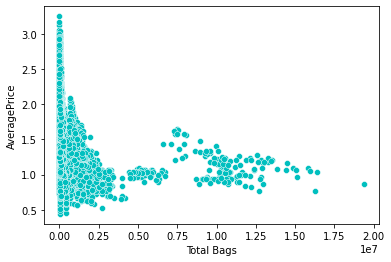

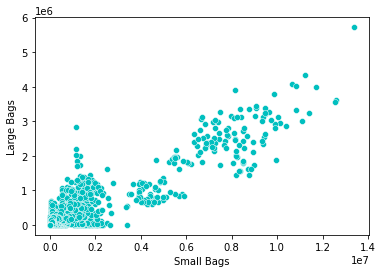

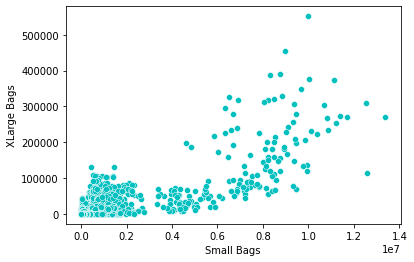

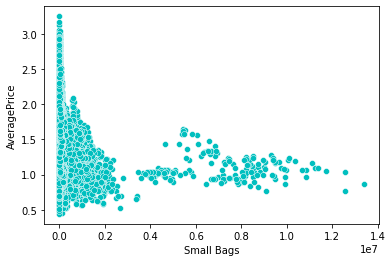

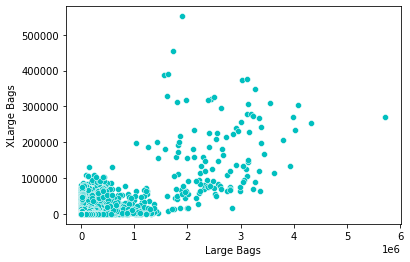

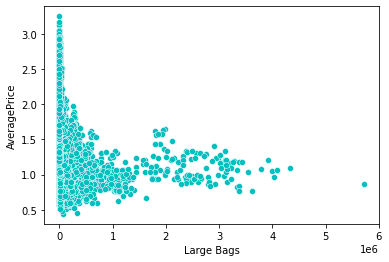

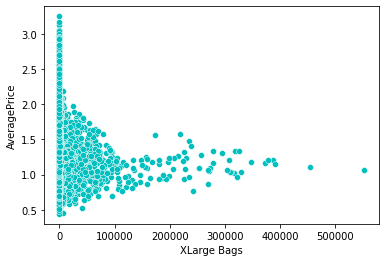

In [61]:
for i in range(len(df_continuos)):
    for j in df_continuos[i+1:]:
        plt.figure(figsize = (6,4))
        sns.scatterplot(df[df_continuos[i]], df[j], color = 'c')
        plt.show()

#### Observations: 
    
With the increase in 4046, 4225, 4770, Total Bags, Small Bags, Large Bags,Xlarge Bags Total volume increases.

But Total volume decrease with the increase in price.

4046 increases with respect to 4225, 4770, Total Bags, Small, and Large Bags, Xlarge Bags and vice versa. But incase of price 4046 decreases.

4770 size increases price of the avacado decreases.

Total bags are linearly increases with respect to Small and Large bags.

Average price decrease with increase in Small bags and Large bags.

## Strip/Swarm Plot

In [62]:
# for i in df_continuos:
#     plt.figure(figsize = (8,8))
#     sns.swarmplot(x = i, y = 'AveragePrice', data = df)
    
    
# for i in df_continuos:
#     plt.figure(figsize = (8,8))
#    sns.stripplot(x = i, y = 'AveragePrice', data = df)

# It takes so much time to rerun again.

## Inline Plot

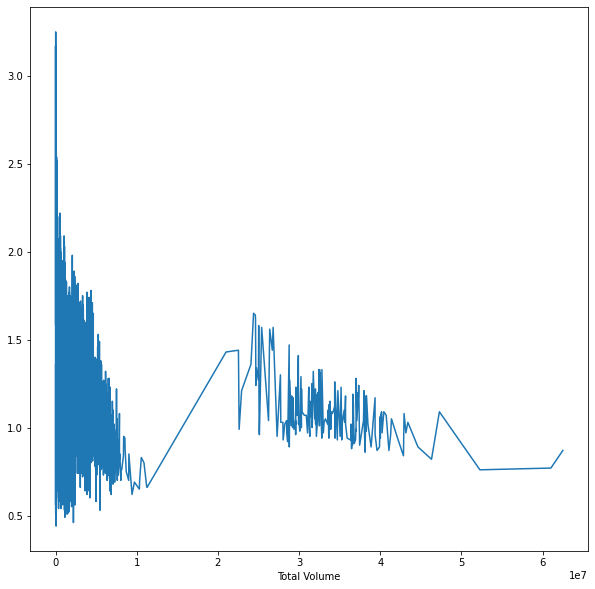

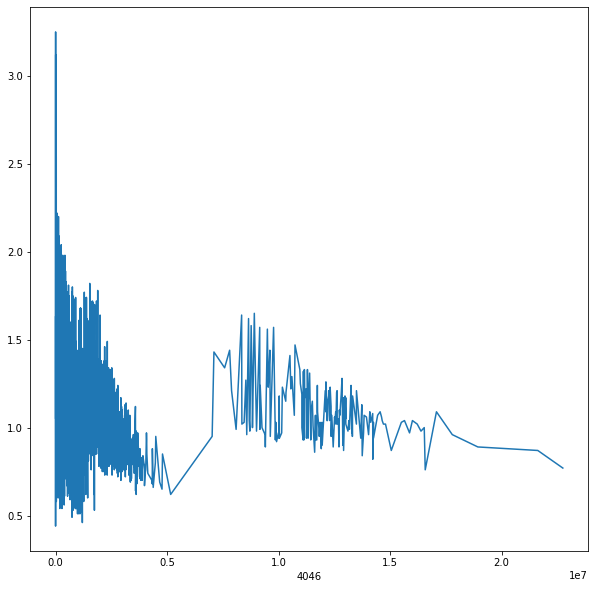

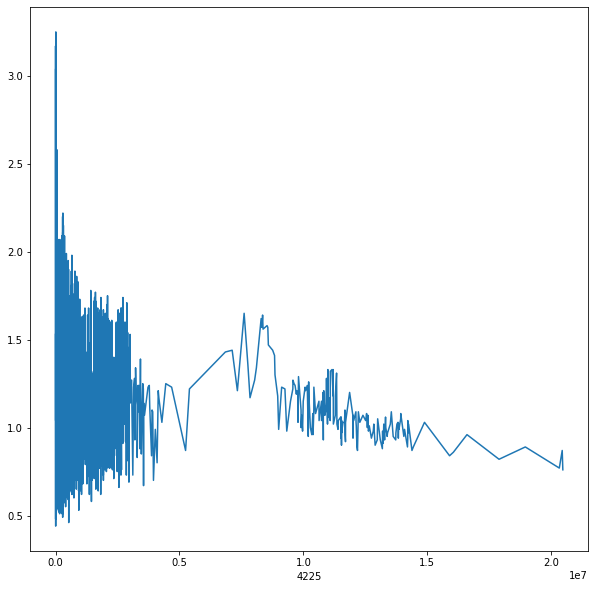

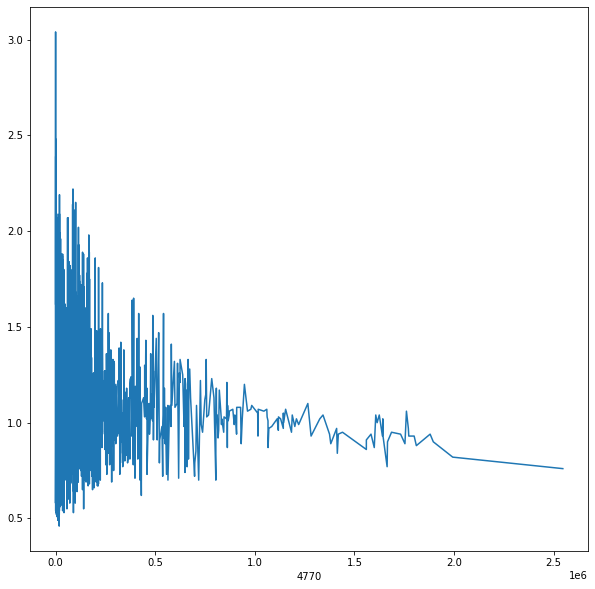

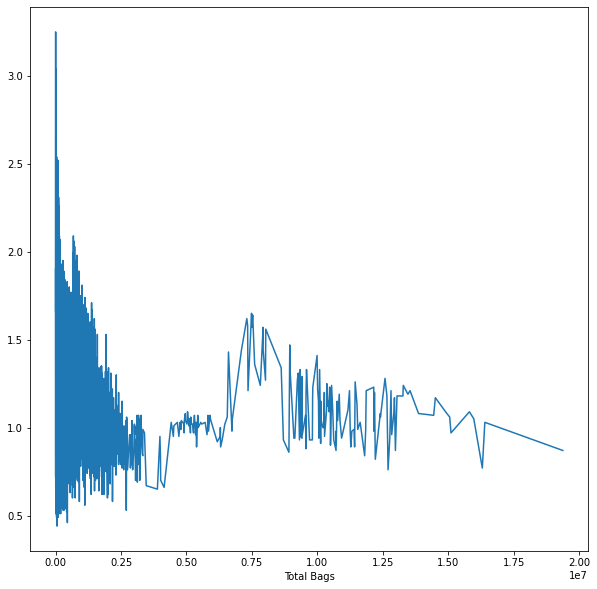

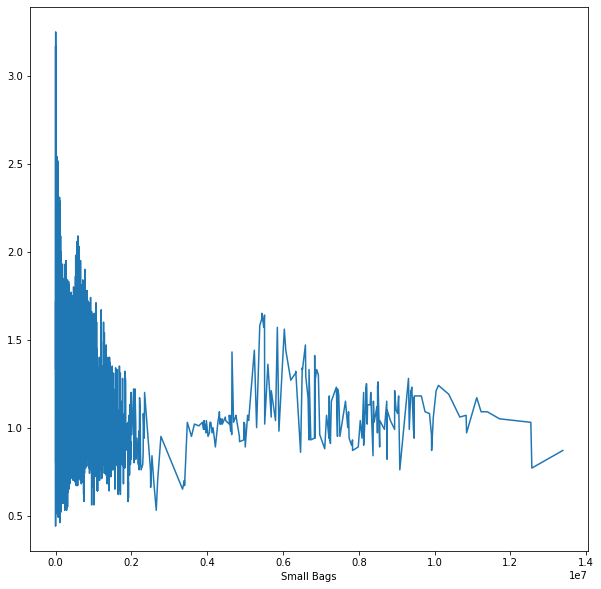

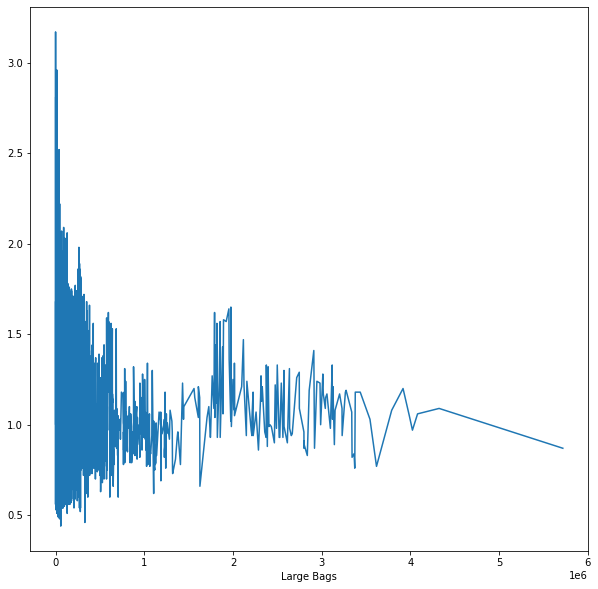

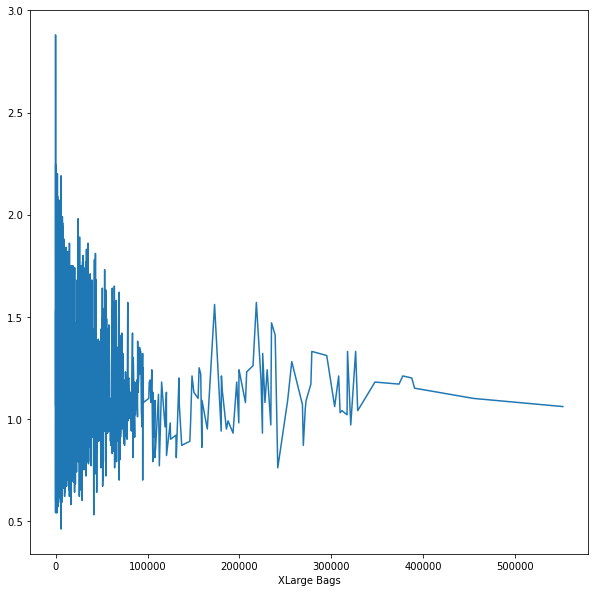

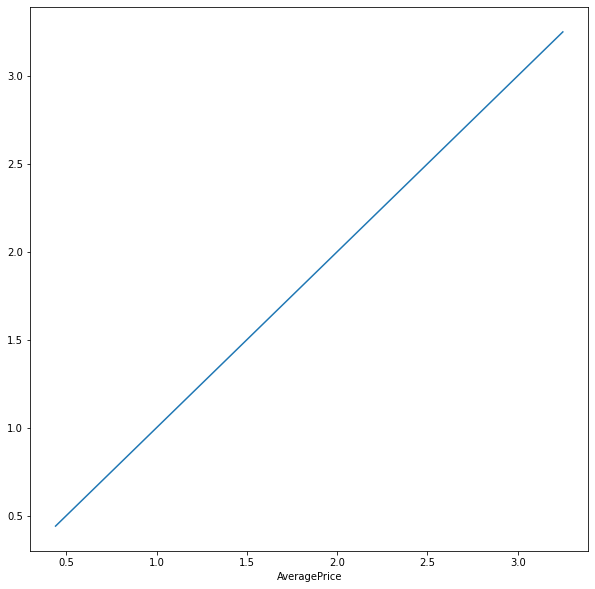

In [63]:
for i in df_continuos:
    plt.figure(figsize = (10,10))
    df.groupby(i)['AveragePrice'].mean().plot()
    plt.show()
    

#### Observations: Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags', prices are decreasing with increase in size. 

## Violin Plot

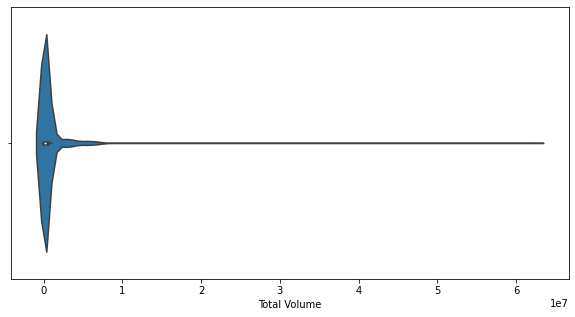

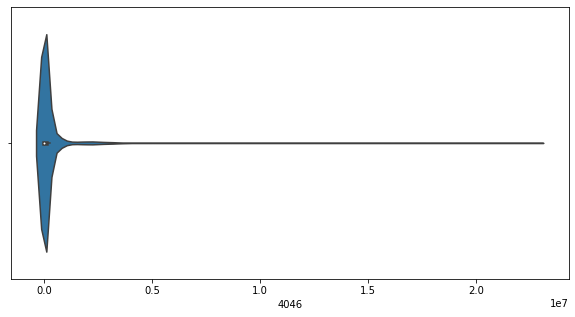

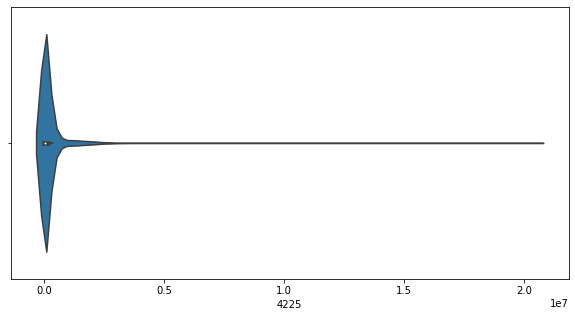

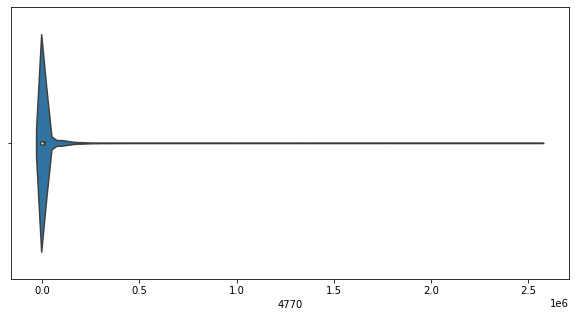

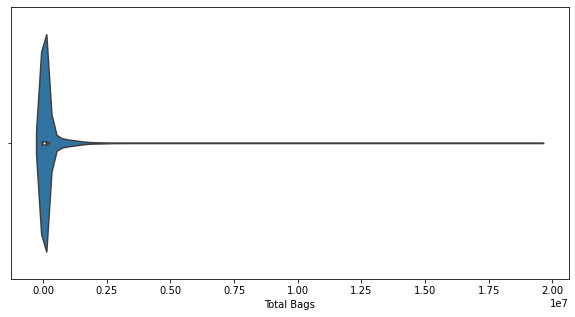

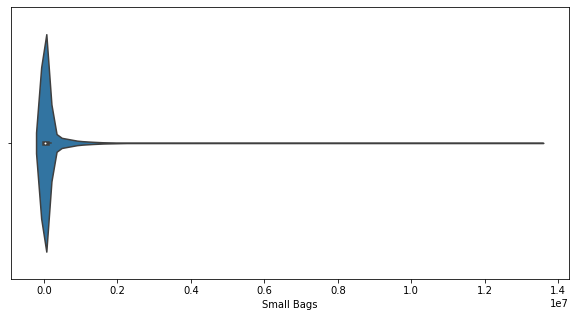

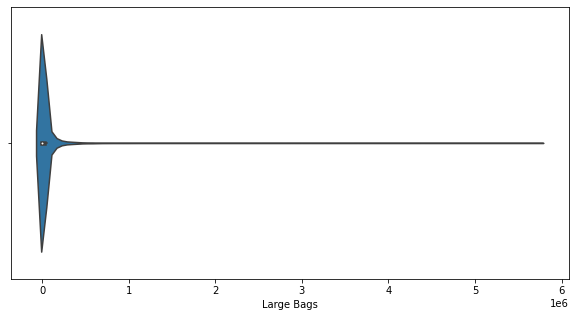

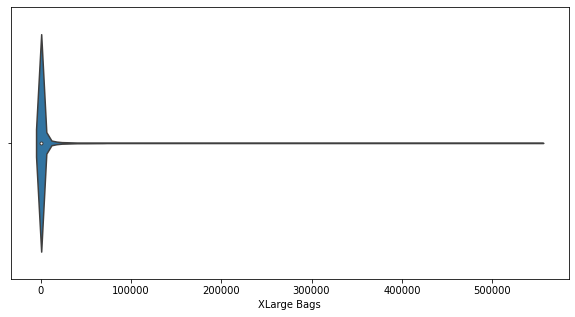

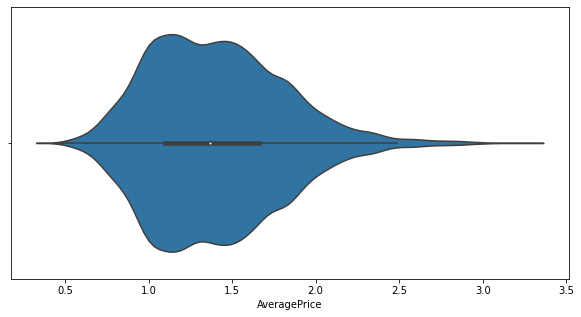

In [64]:
for i in df_continuos:
    plt.figure(figsize = (10,5))
    sns.violinplot(df[i] , data = df)
    
    
# checking spreading density of the data

#### Observations: Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags' not having similar density it shows that these columns of dataset probably having outliers.

### Histogram for checking Frequencies

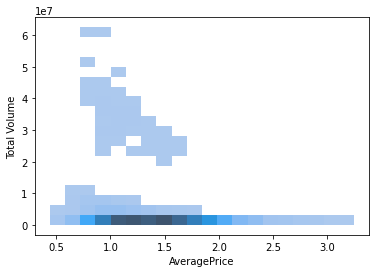

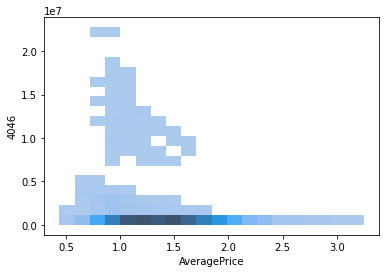

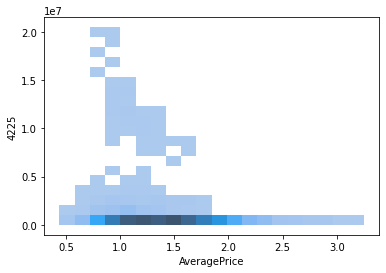

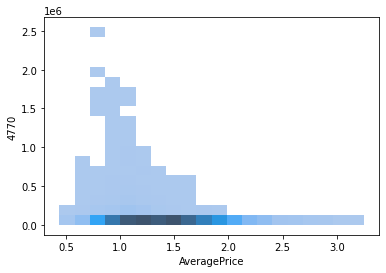

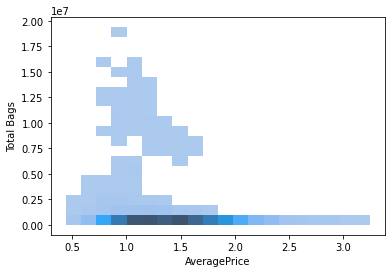

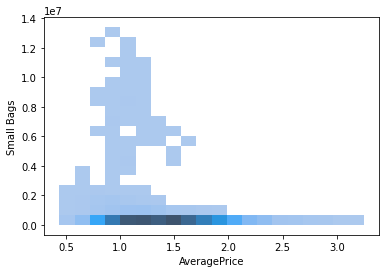

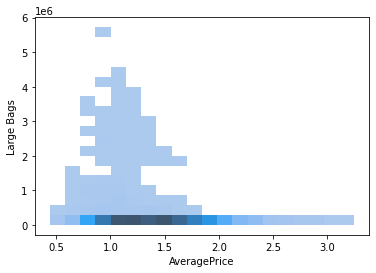

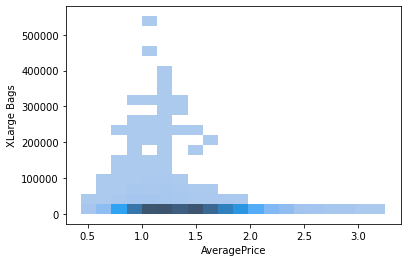

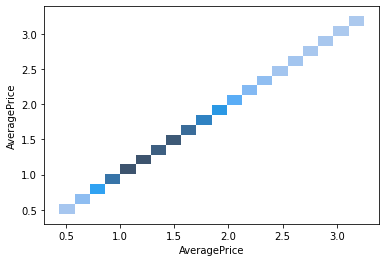

In [65]:
for i in df_continuos:
    plt.figure()
    sns.histplot(x = df['AveragePrice'], y = df[i],  bins = 20)
    plt.show()

#### From above graph we can see that darker colors shows higher frequencies of the data set with respect to average price and respective columns.

## Checking outliers

We know that dataset having object columns type and region, also date these dataset probably not having any outliers hence we are checking outliers for continuos datatypes. 

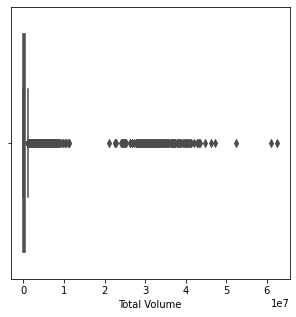

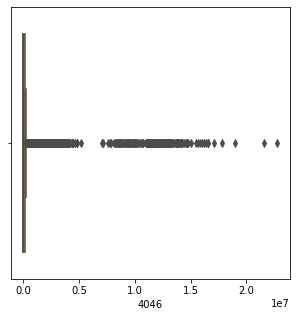

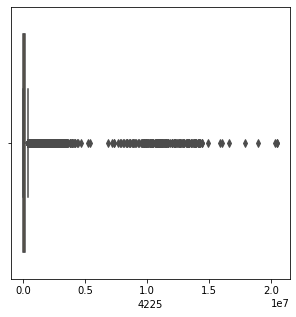

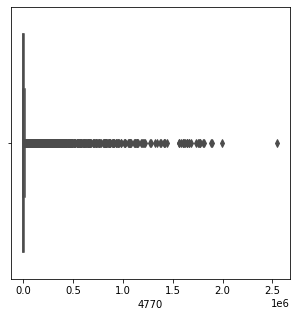

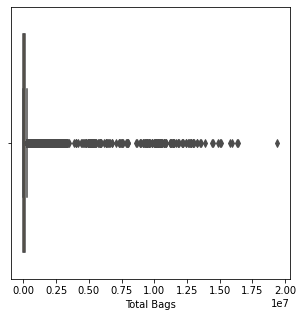

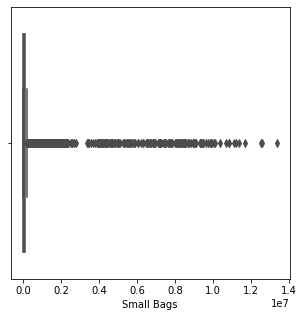

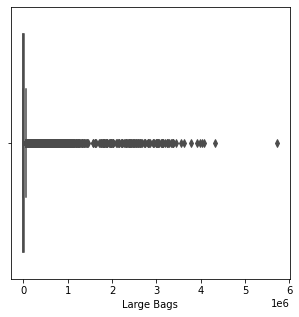

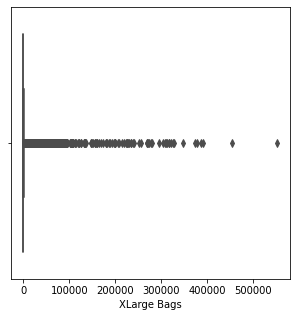

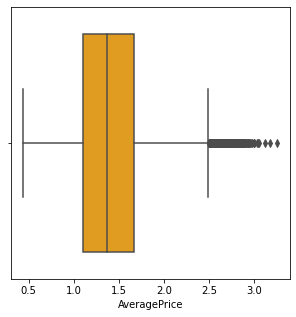

In [66]:
for i in df_continuos:
    plt.figure(figsize = (5,5))
    sns.boxplot(df[i], orient='v', color='orange',)

#### From above observations we can say that above all dataset columns having outliers.

Only average price having less outliers then others with range in 2.5 to 3.5 

## Checking Skewness

In [37]:
df[df_continuos].skew()

Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
AveragePrice     0.580303
dtype: float64

<Figure size 72x36 with 0 Axes>

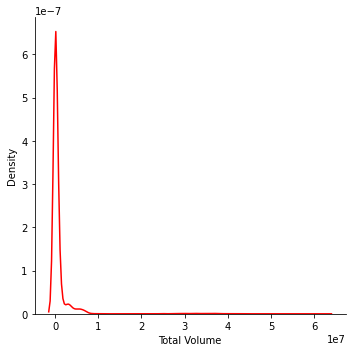

<Figure size 72x36 with 0 Axes>

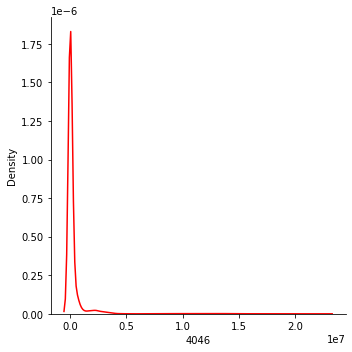

<Figure size 72x36 with 0 Axes>

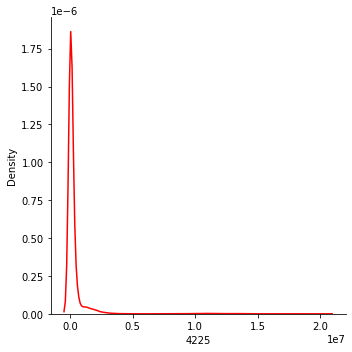

<Figure size 72x36 with 0 Axes>

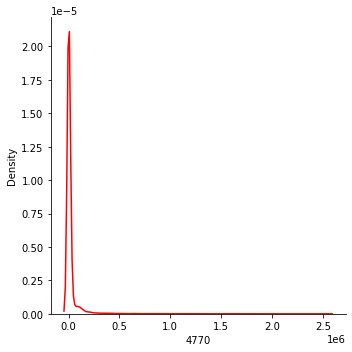

<Figure size 72x36 with 0 Axes>

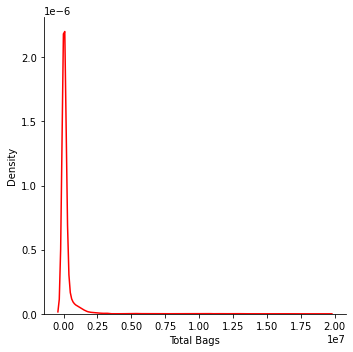

<Figure size 72x36 with 0 Axes>

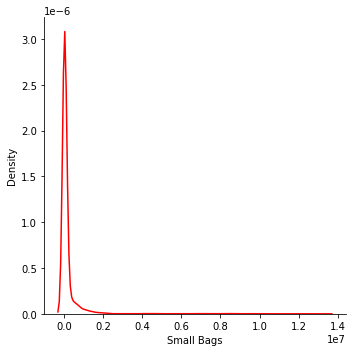

<Figure size 72x36 with 0 Axes>

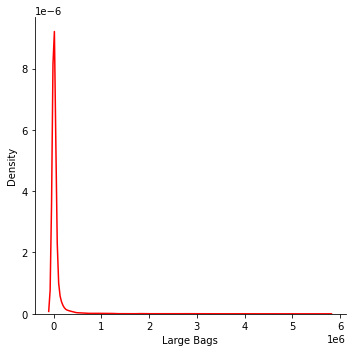

<Figure size 72x36 with 0 Axes>

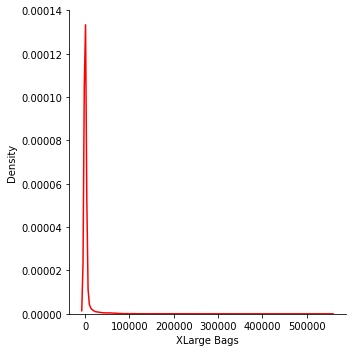

<Figure size 72x36 with 0 Axes>

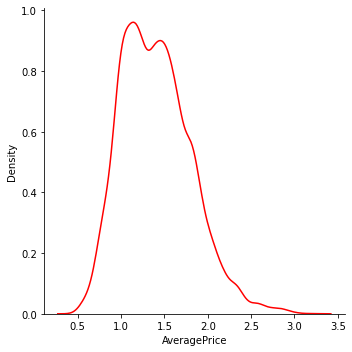

In [38]:
for i in df_continuos:
    plt.figure(figsize = (1,0.5))
    sns.displot(df[i], kind = 'kde', color = 'red',)

#### Every columns of the dataset are right skewed. But in the case of average price show little bit right skewness towards right side.

### Checking Distribution of the dataset

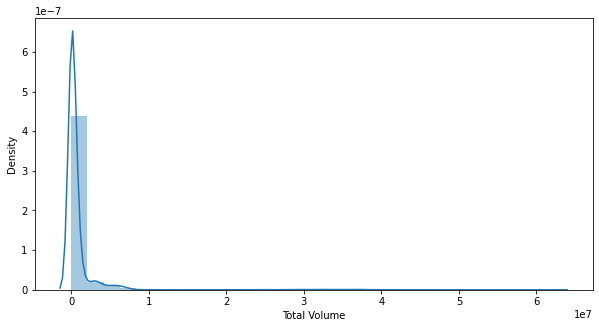

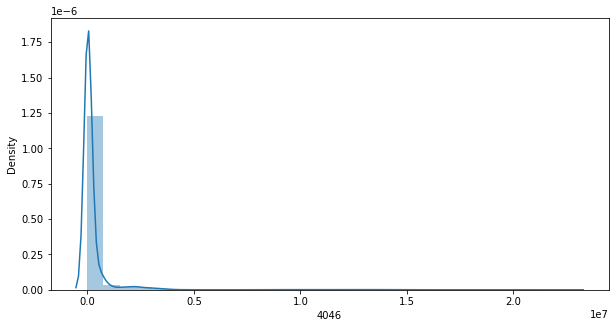

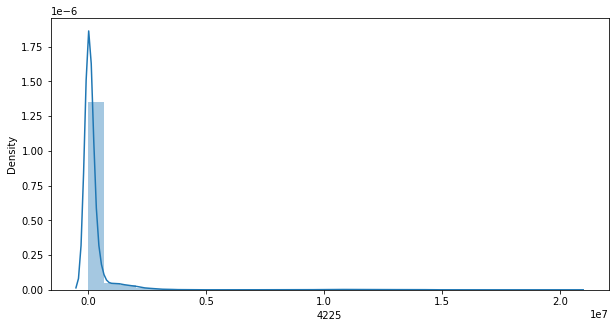

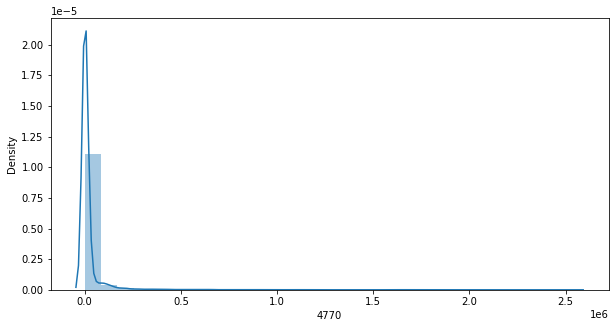

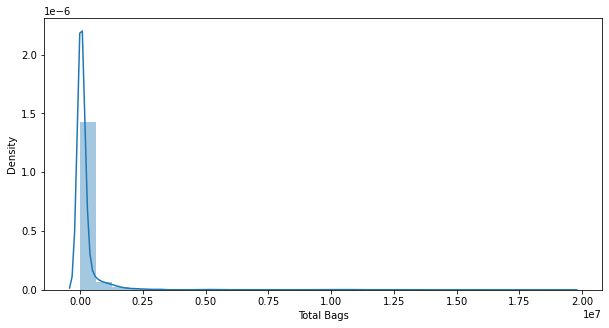

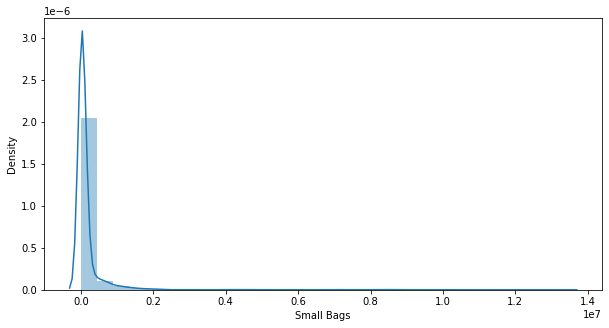

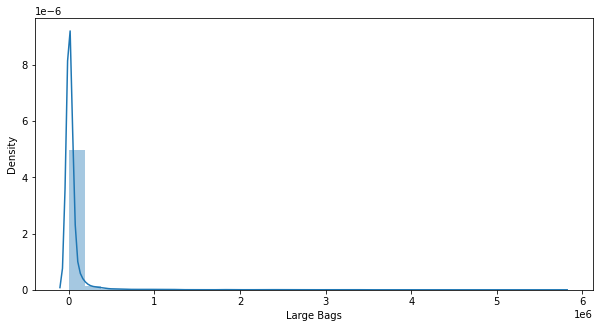

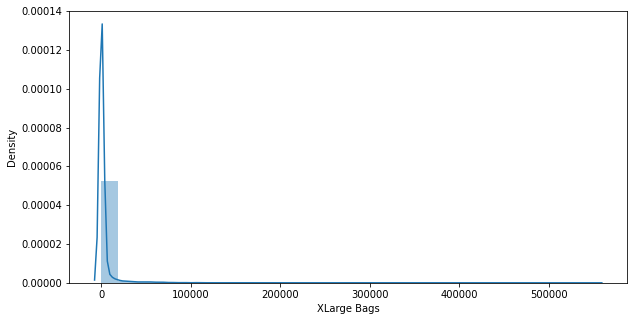

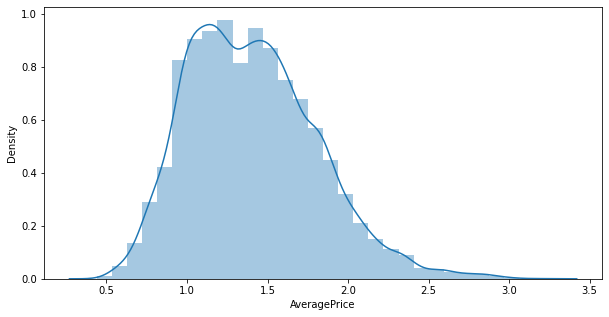

In [39]:
for i in df_continuos:
    plt.figure(figsize = (10,5))
    sns.distplot(df[i], bins = 30)

#### Every columns are right distributed towards the dataset.

#### 

## Checking Overall Glimpse of the Dataset by Pairplot

<Figure size 1080x1080 with 0 Axes>

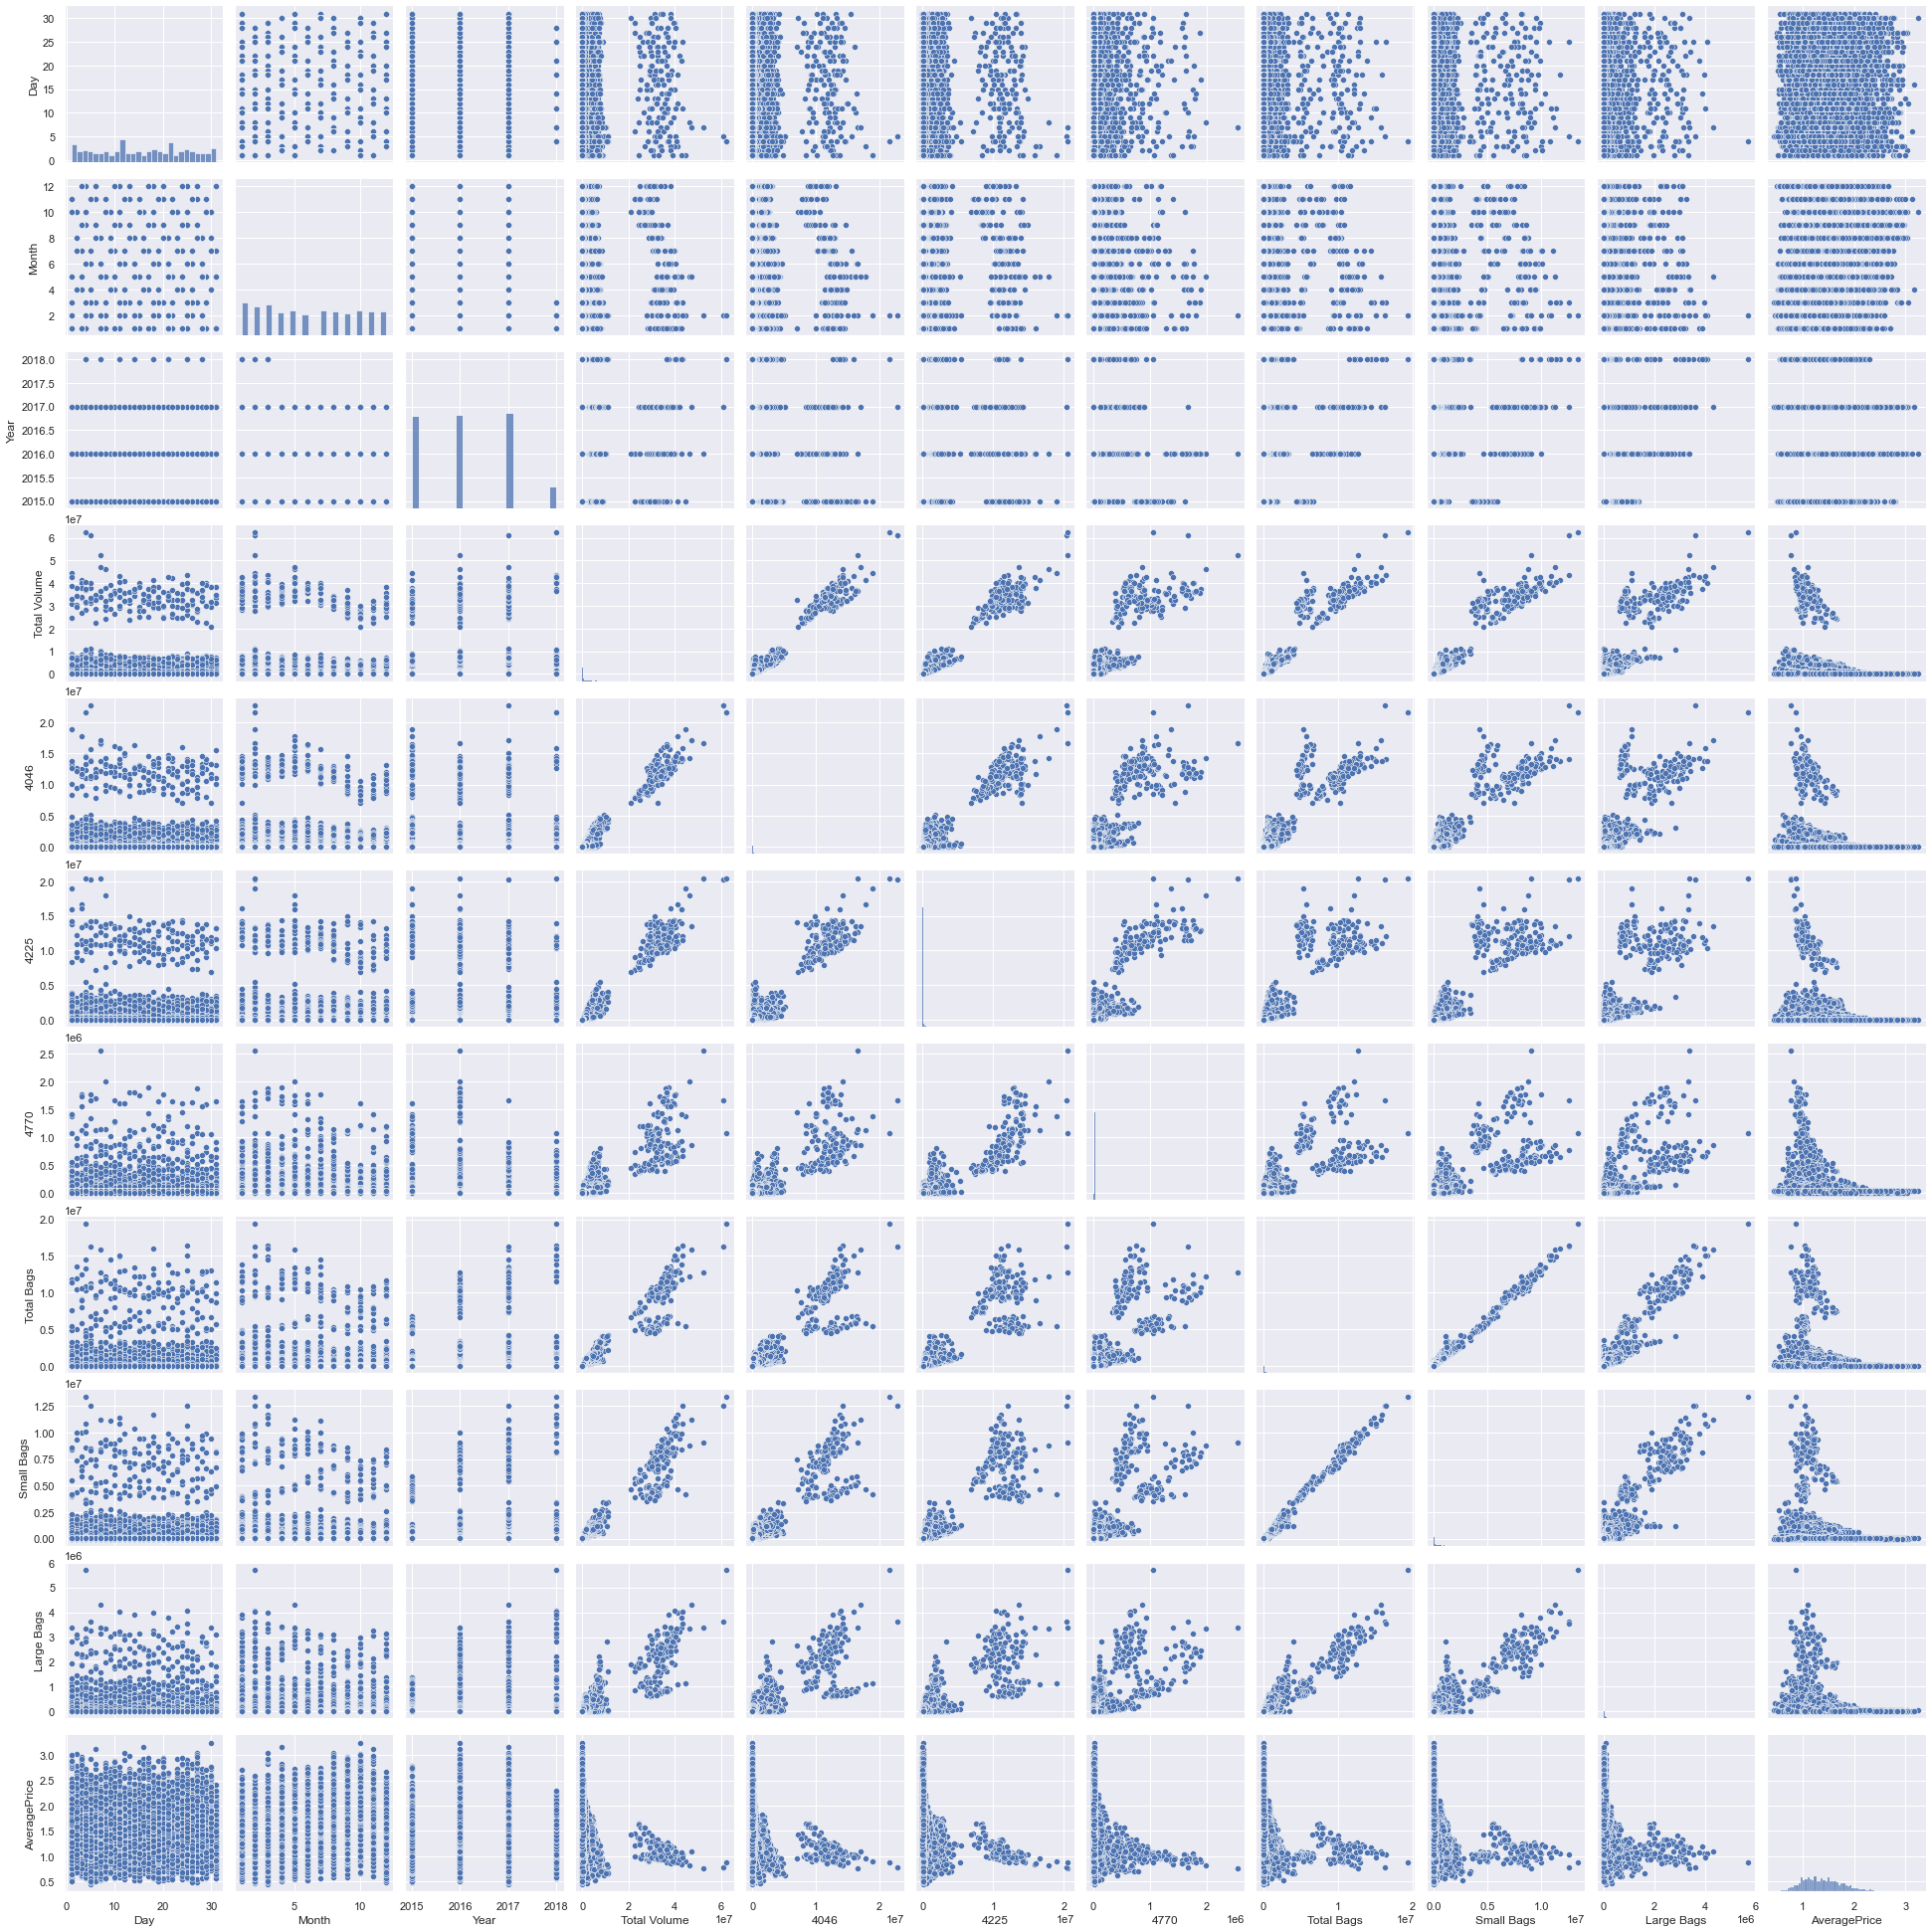

In [324]:
plt.figure(figsize = (15,15))
sns.pairplot(df)

### Here we observe all the dataset performance with respect to each other in a single view are very much similar to as per above bivariate and univariate analysis.

## Preprocessing of Dataset

In [40]:
df.describe()

Year  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean    2016.147899  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.939938  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min     2015.000000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%     2015.000000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%     2016.000000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%     2017.000000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max     2018.000000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags  AveragePrice  
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000  
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507      1.405978  
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.402677  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000      0.440000  
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000      1.100000  
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000      1.370000  
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000      1.660000  
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000      3.250000

<AxesSubplot:>

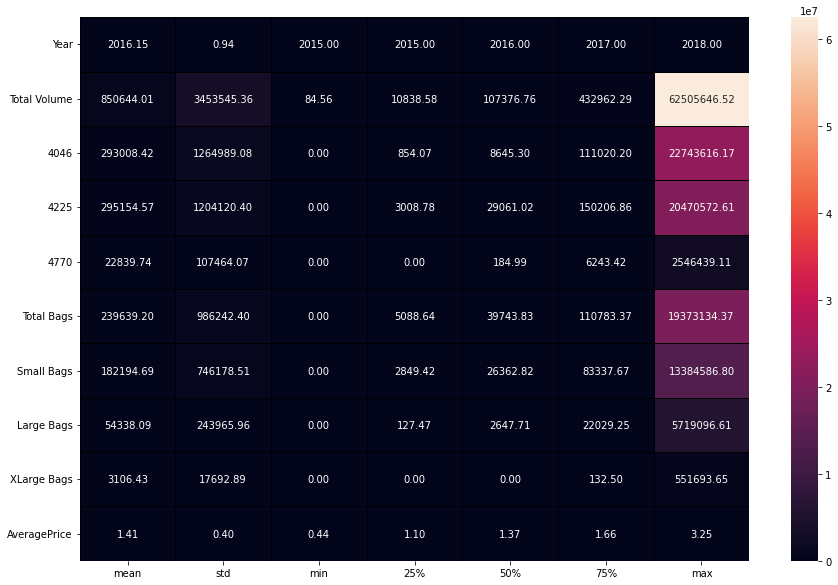

In [41]:
plt.figure(figsize = (15,10))
sns.heatmap(df.describe()[1:].transpose(), annot = True, linecolor='black', linewidths=0.5, fmt = '.2f')

#checking description visually

#### Total volume, 4046, 4225, Total Bags, Small Bags, Large Bags, XLarge Bags probably having outlier because there max values are much higher then its mean values.

# Checking Correlation of the Dataset

In [42]:
df.corr()

Year  Total Volume      4046      4225      4770  \
Year          1.000000      0.017193  0.003353 -0.009559 -0.036531   
Total Volume  0.017193      1.000000  0.977863  0.974181  0.872202   
4046          0.003353      0.977863  1.000000  0.926110  0.833389   
4225         -0.009559      0.974181  0.926110  1.000000  0.887855   
4770         -0.036531      0.872202  0.833389  0.887855  1.000000   
Total Bags    0.071552      0.963047  0.920057  0.905787  0.792314   
Small Bags    0.063915      0.967238  0.925280  0.916031  0.802733   
Large Bags    0.087891      0.880640  0.838645  0.810015  0.698471   
XLarge Bags   0.081033      0.747157  0.699377  0.688809  0.679861   
AveragePrice  0.093197     -0.192752 -0.208317 -0.172928 -0.179446   

              Total Bags  Small Bags  Large Bags  XLarge Bags  AveragePrice  
Year            0.071552    0.063915    0.087891     0.081033      0.093197  
Total Volume    0.963047    0.967238    0.880640     0.747157     -0.192752  
4046            0.920057    0.925280    0.838645     0.699377     -0.208317  
4225            0.905787    0.916031    0.810015     0.688809     -0.172928  
4770            0.792314    0.802733    0.698471     0.679861     -0.179446  
Total Bags      1.000000    0.994335    0.943009     0.804233     -0.177088  
Small Bags      0.994335    1.000000    0.902589     0.806845     -0.174730  
Large Bags      0.943009    0.902589    1.000000     0.710858     -0.172940  
XLarge Bags     0.804233    0.806845    0.710858     1.000000     -0.117592  
AveragePrice   -0.177088   -0.174730   -0.172940    -0.117592      1.000000

<AxesSubplot:>

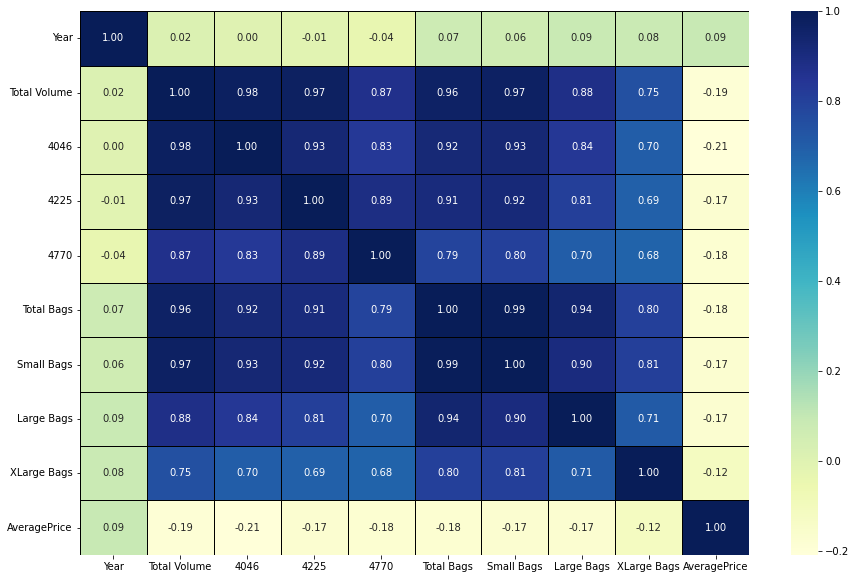

In [43]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True, linecolor = 'black', linewidths = 1, fmt = '.2f', cmap="YlGnBu" )

#### Observations: 

'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags' are highly correlated with each other.

Average prices shows negative correlation with most of the dataset like 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags. 

## Checking Positive and Negative Correlation with the dataset

<AxesSubplot:>

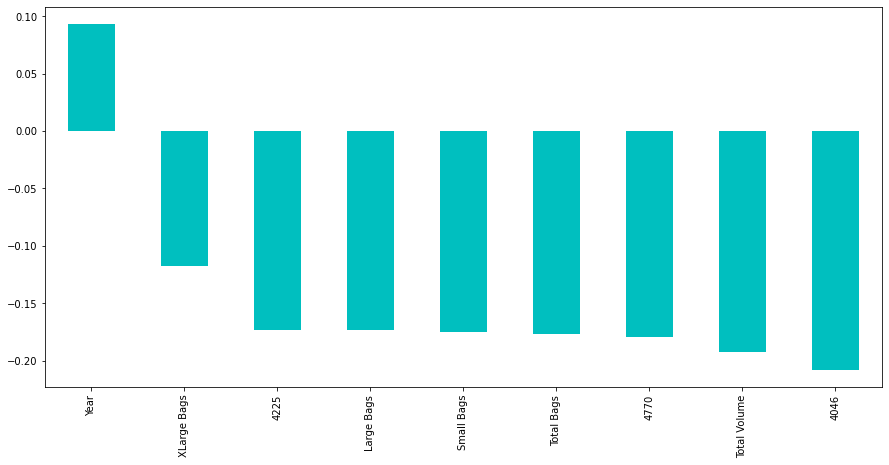

In [44]:
plt.figure(figsize = (15,7))
df.corr()['AveragePrice'].sort_values(ascending = False).drop(['AveragePrice']).plot(kind = 'bar', color = 'c')

#### 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags, Xlarge Bags shows negative correlation towards target variable.

In [37]:
df2 = df.copy()  # copying dataset for classification model 

In [38]:
df2.head()

Month  Year  Total Volume     4046       4225    4770  Total Bags  \
0    12  2015      64236.62  1036.74   54454.85   48.16     8696.87   
1    12  2015      54876.98   674.28   44638.81   58.33     9505.56   
2    12  2015     118220.22   794.70  109149.67  130.50     8145.35   
3    12  2015      78992.15  1132.00   71976.41   72.58     5811.16   
4    11  2015      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  region  AveragePrice  
0     8603.62       93.25          0.0  conventional  Albany          1.33  
1     9408.07       97.49          0.0  conventional  Albany          1.35  
2     8042.21      103.14          0.0  conventional  Albany          0.93  
3     5677.40      133.76          0.0  conventional  Albany          1.08  
4     5986.26      197.69          0.0  conventional  Albany          1.28

#### 

## Converting Categorical Dataset to Machine Understandable Form using Label Encoder

In [45]:
from sklearn.preprocessing import LabelEncoder
lec = LabelEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = lec.fit_transform(df[i].values.reshape(-1,1))

In [46]:
df.sample(5)  #Checking result of label encoder

Month  Year  Total Volume       4046       4225       4770  Total Bags  \
4728       0  2016     596989.37   60000.87  208201.05   17305.06   311482.39   
3265       2  2016     823796.56   39540.49  569733.57  125901.94    88620.56   
3109       2  2016     163501.31    1393.58   77324.69      25.28    84757.76   
8875       2  2018    1299190.92  626645.87  243424.78   14272.43   414847.84   
15645     11  2017      13690.78      77.91    3133.36       5.58    10473.93   

       Small Bags  Large Bags  XLarge Bags  type  region  AveragePrice  
4728    307475.27     3800.73       206.39     0      36          0.90  
3265     86428.90     2191.66         0.00     0       8          1.00  
3109     84757.76        0.00         0.00     0       5          1.11  
8875    204096.69   205346.71      5404.44     0      33          0.71  
15645    10446.04       27.89         0.00     1      17          1.81

### Using Get Dummies Method to prevent overfitting of Model as Model having so many columns with Multiple Unique Values

In [47]:
df = pd.get_dummies(data = df, columns = ['type', 'region','Month'])

In [48]:
df.shape

(18249, 78)

## Removing Outliers from the Dataset

In [49]:
from scipy.stats import zscore

z = np.abs(zscore(df[df_continuos]))

# taking thresold value = 3
#np.where(z>3)

df_new = df[(z<3).all(axis = 1)]

In [50]:
print(df_new.shape)
print(df.shape)
# (17289, 14)
# (17788, 14)

(17651, 78)
(18249, 78)


## Percentage of Data Loss

In [51]:
print('Percentage of Data Loss', (18249-17651)/18249*100)

Percentage of Data Loss 3.276891884486821


## Removing Outliers with Interquartile Method

In [52]:
Q1 = df[df_continuos].quantile(.25)
Q3 = df[df_continuos].quantile(.75)
IQR = Q3 - Q1

In [53]:
df_IQR = df[~((df[df_continuos]<(Q1 - 1.5*IQR)) | (df[df_continuos]>(Q3 + 1.5*IQR))).any(axis = 1)]

In [54]:
df_IQR.shape

(11538, 78)

## Percentage of Data Loss

In [55]:
print('Percentage of Data Loss', (18249-11538)/18249*100)

Percentage of Data Loss 36.774617787276014


### By using Interquartile Method we find that heavy data loss taken upto 36.77 percent hence we are considering Zscore method for removing outliers.

#### 

## Checking Outliers after removal

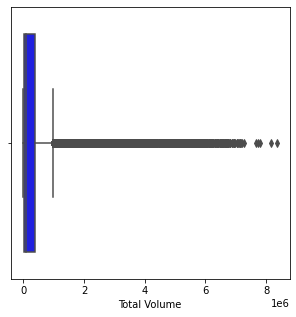

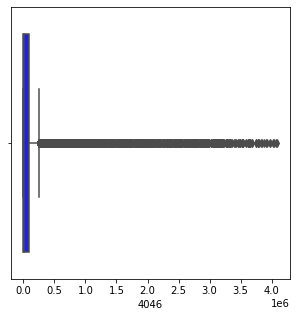

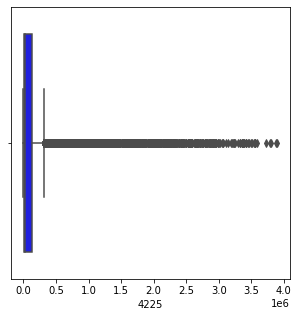

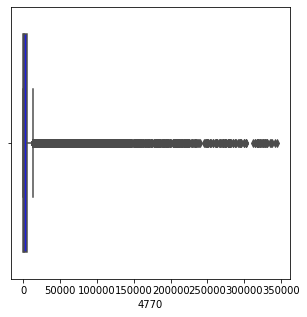

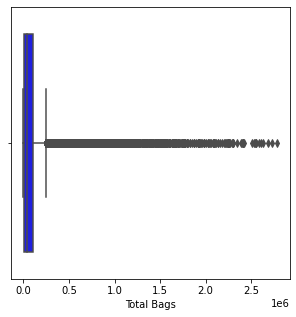

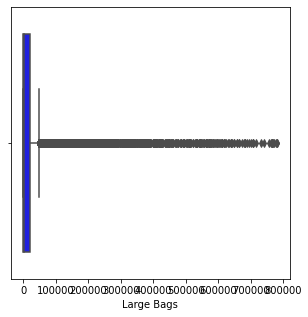

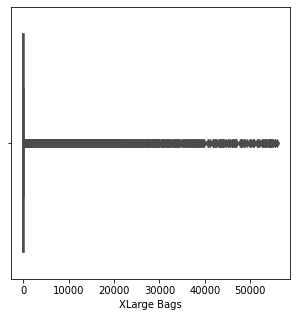

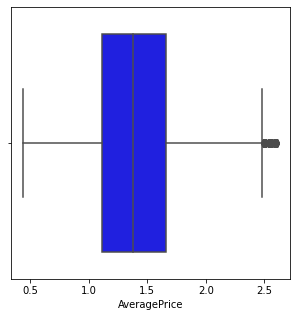

In [50]:
for i in df_new[df_continuos]:
    plt.figure(figsize = (5,5))
    sns.boxplot(df_new[i], orient='v', color='blue')

### We find that some of the outliers are removed from the previous outliers observations. 

#### 

# Removing Skewness

In [51]:
from sklearn.preprocessing import PowerTransformer
pw = PowerTransformer('yeo-johnson')

In [52]:
skew_col = ['Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags', 'XLarge Bags']

In [53]:
df_new[skew_col].skew()  # checking skewness

Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
dtype: float64

In [54]:
df_new[skew_col] = pw.fit_transform(df_new[skew_col])
df_new[skew_col].skew()

Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
dtype: float64

<Figure size 72x36 with 0 Axes>

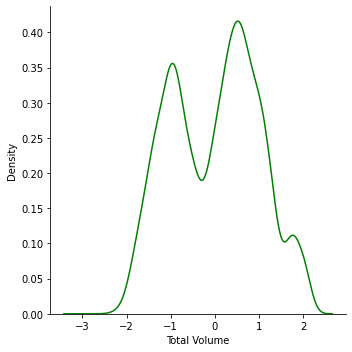

<Figure size 72x36 with 0 Axes>

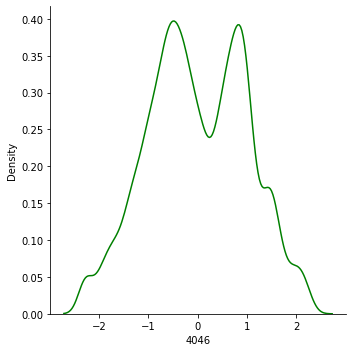

<Figure size 72x36 with 0 Axes>

<Figure size 72x36 with 0 Axes>

<Figure size 72x36 with 0 Axes>

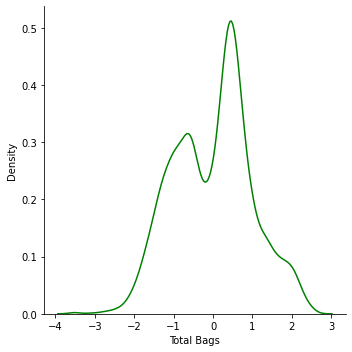

<Figure size 72x36 with 0 Axes>

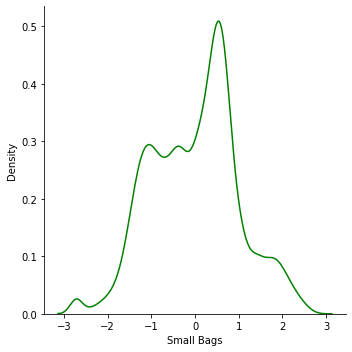

<Figure size 72x36 with 0 Axes>

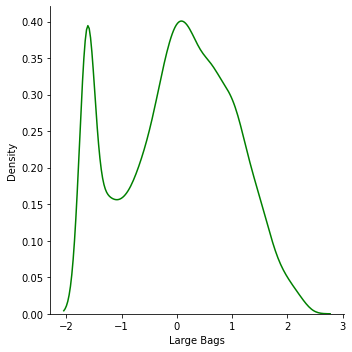

<Figure size 72x36 with 0 Axes>

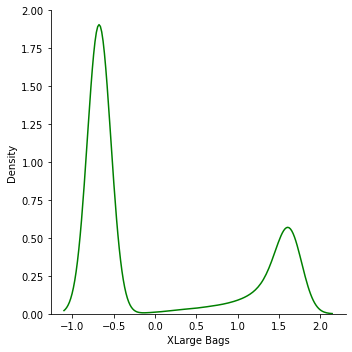

In [55]:
for i in df_new[skew_col]:
    plt.figure(figsize = (1,0.5))
    sns.displot(df_new[i], kind = 'kde', color = 'green')

#### 

# Dividing data for feature selection

In [56]:
x = df_new.drop(['AveragePrice'], axis = 1)
y = df_new['AveragePrice']

In [57]:
x.shape

(17651, 77)

In [58]:
x.head(1)

Year  Total Volume      4046     4225      4770  Total Bags  Small Bags  \
0  2015     -0.075324 -0.657421  0.35143 -0.222566   -0.537507   -0.347421   

   Large Bags  XLarge Bags  type_0  type_1  region_0  region_1  region_2  \
0   -0.781153    -0.677919       1       0         1         0         0   

   region_3  region_4  region_5  region_6  region_7  region_8  region_9  \
0         0         0         0         0         0         0         0   

   region_10  region_11  region_12  region_13  region_14  region_15  \
0          0          0          0          0          0          0   

   region_16  region_17  region_18  region_19  region_20  region_21  \
0          0          0          0          0          0          0   

   region_22  region_23  region_24  region_25  region_26  region_27  \
0          0          0          0          0          0          0   

   region_28  region_29  region_30  region_31  region_32  region_33  \
0          0          0          0          0          0          0   

   region_34  region_35  region_36  region_37  region_38  region_39  \
0          0          0          0          0          0          0   

   region_40  region_41  region_42  region_43  region_44  region_45  \
0          0          0          0          0          0          0   

   region_46  region_47  region_48  region_49  region_50  region_51  \
0          0          0          0          0          0          0   

   region_52  region_53  Month_0  Month_1  Month_2  Month_3  Month_4  Month_5  \
0          0          0        0        0        0        0        0        0   

   Month_6  Month_7  Month_8  Month_9  Month_10  Month_11  
0        0        0        0        0         0         1

In [59]:
y.shape

(17651,)

## Checking multicolinearity of the dataset

In [98]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [99]:
def calc_vif(x):
    
    vif = pd.DataFrame()
    vif['Variance'] = x.columns
    vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

In [100]:
calc_vif(x)

Variance  VIF Factor
0           Year    1.896058
1   Total Volume   79.961679
2           4046   16.791057
3           4225   17.983359
4           4770    6.752442
5     Total Bags   46.241831
6     Small Bags   24.851611
7     Large Bags    4.994655
8    XLarge Bags    2.492261
9         type_0         inf
10        type_1         inf
11      region_0         inf
12      region_1         inf
13      region_2         inf
14      region_3         inf
15      region_4         inf
16      region_5         inf
17      region_6         inf
18      region_7         inf
19      region_8         inf
20      region_9         inf
21     region_10         inf
22     region_11         inf
23     region_12         inf
24     region_13         inf
25     region_14         inf
26     region_15         inf
27     region_16         inf
28     region_17         inf
29     region_18         inf
30     region_19         inf
31     region_20         inf
32     region_21         inf
33     region_22         inf
34     region_23         inf
35     region_24         inf
36     region_25         inf
37     region_26         inf
38     region_27         inf
39     region_28         inf
40     region_29         inf
41     region_30         inf
42     region_31         inf
43     region_32         inf
44     region_33         inf
45     region_34         inf
46     region_35         inf
47     region_36         inf
48     region_37         inf
49     region_38         inf
50     region_39         inf
51     region_40         inf
52     region_41         inf
53     region_42         inf
54     region_43         inf
55     region_44         inf
56     region_45         inf
57     region_46         inf
58     region_47         inf
59     region_48         inf
60     region_49         inf
61     region_50         inf
62     region_51         inf
63     region_52         inf
64     region_53         inf
65       Month_0         inf
66       Month_1         inf
67       Month_2         inf
68       Month_3         inf
69       Month_4         inf
70       Month_5         inf
71       Month_6         inf
72       Month_7         inf
73       Month_8         inf
74       Month_9         inf
75      Month_10         inf
76      Month_11         inf

#### From above code we find that Total Volume, Total bags and small bags shows high multicollinearity towards dataset hence we need to remove it.

#### But for the less no. of columns we need to remove it one by one after checking affect on new VIF as per correlation of the dataset Total Volume, avacado types and all bags are highly correlated with each others.

### We are dropping first Total Volume

In [101]:
x.drop(['Total Volume'], axis = 1, inplace = True)

In [102]:
calc_vif(x)

Variance  VIF Factor
0          Year    1.893481
1          4046   12.742849
2          4225   12.232146
3          4770    6.752351
4    Total Bags   33.525269
5    Small Bags   24.753122
6    Large Bags    4.991562
7   XLarge Bags    2.451971
8        type_0         inf
9        type_1         inf
10     region_0         inf
11     region_1         inf
12     region_2         inf
13     region_3         inf
14     region_4         inf
15     region_5         inf
16     region_6         inf
17     region_7         inf
18     region_8         inf
19     region_9         inf
20    region_10         inf
21    region_11         inf
22    region_12         inf
23    region_13         inf
24    region_14         inf
25    region_15         inf
26    region_16         inf
27    region_17         inf
28    region_18         inf
29    region_19         inf
30    region_20         inf
31    region_21         inf
32    region_22         inf
33    region_23         inf
34    region_24         inf
35    region_25         inf
36    region_26         inf
37    region_27         inf
38    region_28         inf
39    region_29         inf
40    region_30         inf
41    region_31         inf
42    region_32         inf
43    region_33         inf
44    region_34         inf
45    region_35         inf
46    region_36         inf
47    region_37         inf
48    region_38         inf
49    region_39         inf
50    region_40         inf
51    region_41         inf
52    region_42         inf
53    region_43         inf
54    region_44         inf
55    region_45         inf
56    region_46         inf
57    region_47         inf
58    region_48         inf
59    region_49         inf
60    region_50         inf
61    region_51         inf
62    region_52         inf
63    region_53         inf
64      Month_0         inf
65      Month_1         inf
66      Month_2         inf
67      Month_3         inf
68      Month_4         inf
69      Month_5         inf
70      Month_6         inf
71      Month_7         inf
72      Month_8         inf
73      Month_9         inf
74     Month_10         inf
75     Month_11         inf

### Now we are dropping Total Bags

In [103]:
x.drop(['Total Bags'], axis = 1, inplace = True)

In [104]:
calc_vif(x)

Variance  VIF Factor
0          Year    1.800446
1          4046   12.742666
2          4225   12.193975
3          4770    6.735918
4    Small Bags    9.673537
5    Large Bags    3.274279
6   XLarge Bags    2.440700
7        type_0         inf
8        type_1         inf
9      region_0         inf
10     region_1         inf
11     region_2         inf
12     region_3         inf
13     region_4         inf
14     region_5         inf
15     region_6         inf
16     region_7         inf
17     region_8         inf
18     region_9         inf
19    region_10         inf
20    region_11         inf
21    region_12         inf
22    region_13         inf
23    region_14         inf
24    region_15         inf
25    region_16         inf
26    region_17         inf
27    region_18         inf
28    region_19         inf
29    region_20         inf
30    region_21         inf
31    region_22         inf
32    region_23         inf
33    region_24         inf
34    region_25         inf
35    region_26         inf
36    region_27         inf
37    region_28         inf
38    region_29         inf
39    region_30         inf
40    region_31         inf
41    region_32         inf
42    region_33         inf
43    region_34         inf
44    region_35         inf
45    region_36         inf
46    region_37         inf
47    region_38         inf
48    region_39         inf
49    region_40         inf
50    region_41         inf
51    region_42         inf
52    region_43         inf
53    region_44         inf
54    region_45         inf
55    region_46         inf
56    region_47         inf
57    region_48         inf
58    region_49         inf
59    region_50         inf
60    region_51         inf
61    region_52         inf
62    region_53         inf
63      Month_0         inf
64      Month_1         inf
65      Month_2         inf
66      Month_3         inf
67      Month_4         inf
68      Month_5         inf
69      Month_6         inf
70      Month_7         inf
71      Month_8         inf
72      Month_9         inf
73     Month_10         inf
74     Month_11         inf

### As per limited dataset columns we find that VIF are now in acceptable zone.

## Standard Scalling

In [105]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [106]:
x_new = ['4046','4225','4770','Small Bags' ,'Large Bags', 'XLarge Bags']

In [107]:
x[x_new] = sc.fit_transform(x[x_new])

In [113]:
x.head(5)

Year      4046      4225      4770  Small Bags  Large Bags  XLarge Bags  \
0  2015 -0.657421  0.351430 -0.222566   -0.347421   -0.781153    -0.677919   
1  2015 -0.777179  0.269513 -0.175223   -0.311322   -0.771198    -0.677919   
2  2015 -0.731776  0.649333  0.023923   -0.374453   -0.758523    -0.677919   
3  2015 -0.632592  0.468799 -0.121164   -0.510991   -0.699123    -0.677919   
4  2015 -0.684504  0.262126 -0.110491   -0.490534   -0.607027    -0.677919   

   type_0  type_1  region_0  region_1  region_2  region_3  region_4  region_5  \
0       1       0         1         0         0         0         0         0   
1       1       0         1         0         0         0         0         0   
2       1       0         1         0         0         0         0         0   
3       1       0         1         0         0         0         0         0   
4       1       0         1         0         0         0         0         0   

   region_6  region_7  region_8  region_9  region_10  region_11  region_12  \
0         0         0         0         0          0          0          0   
1         0         0         0         0          0          0          0   
2         0         0         0         0          0          0          0   
3         0         0         0         0          0          0          0   
4         0         0         0         0          0          0          0   

   region_13  region_14  region_15  region_16  region_17  region_18  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   region_19  region_20  region_21  region_22  region_23  region_24  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   region_25  region_26  region_27  region_28  region_29  region_30  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   region_31  region_32  region_33  region_34  region_35  region_36  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   region_37  region_38  region_39  region_40  region_41  region_42  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   region_43  region_44  region_45  region_46  region_47  region_48  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   region_49  re

## Feature Selection

In [114]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [148]:
class best_model:
    def best_fit(x, y, model):
        random_state_values = []
        for i in range(0,200):
            x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = i, test_size = 0.20)
            model.fit(x_train, y_train)
            pred_train = model.predict(x_train)
            pred_test = model.predict(x_test)

            if round(r2_score(y_train, pred_train)*100,1) == round(r2_score(y_test, pred_test)*100,1):
                print("At random_state:-", i)
                print("Training r2_score is:-", r2_score(pred_train, y_train)*100)
                print("Testing r2_score is:-", r2_score(pred_test, y_test)*100)
                print("\n")
                random_state_values.append(i)
        print("Best fit random_state_values", random_state_values)
    
    
    def final_model(x, y, model, i):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = i)
        model.fit(x_train, y_train)
        pred_train = model.predict(x_train)
        pred_test = model.predict(x_test)
        print("At random state", i , "model giving best accuracy score","\n")
        Train_accuracy = r2_score(pred_train, y_train)
        Test_accuracy = r2_score(pred_test, y_test)
        print('Training accuracy:- ', Train_accuracy*100)
        print('Testing accuracy:- ', Test_accuracy*100)
        print("\n")
        print('--------------------------------------')
        print('Mean squared error:- ', mean_squared_error(pred_test, y_test) )
        print('Mean absolute error:- ', mean_absolute_error(pred_test, y_test) )
        print('Root Mean squared error:-',np.sqrt(mean_squared_error(pred_test, y_test)))
        
        
    def cross_val_score(model, x, y):
        for value in range(2,15):
            cv = cross_val_score(model, x, y, cv = value).mean()
            print('cross_val_score', cv*100,'at cv =', value,)

## Model 1 Linear Regression

In [149]:
model = LinearRegression()

In [150]:
best_model.best_fit(x, y, model)  # checking best random state

At random_state:- 5
Training r2_score is:- 51.42001147084907
Testing r2_score is:- 50.80405818643408


At random_state:- 28
Training r2_score is:- 51.52480305912768
Testing r2_score is:- 52.300435060498664


At random_state:- 58
Training r2_score is:- 51.42666815586306
Testing r2_score is:- 51.25151869835576


At random_state:- 64
Training r2_score is:- 51.40119499212341
Testing r2_score is:- 50.69353717479127


At random_state:- 79
Training r2_score is:- 51.38861034529461
Testing r2_score is:- 52.17735590799687


At random_state:- 104
Training r2_score is:- 51.40595102917338
Testing r2_score is:- 50.74005674819523


At random_state:- 155
Training r2_score is:- 51.407520344787
Testing r2_score is:- 50.71881390111908


At random_state:- 198
Training r2_score is:- 51.38416861931188
Testing r2_score is:- 50.92508683793328


Best fit random_state_values [5, 28, 58, 64, 79, 104, 155, 198]


In [151]:
best_model.final_model(x, y, model, 58) # model giving best testing and training accuracy at 58

At random state 58 model giving best accuracy score 

Training accuracy:-  51.42666815586306
Testing accuracy:-  51.25151869835576


--------------------------------------
Mean squared error:-  0.049418106998263926
Mean absolute error:-  0.17212706637969943
Root Mean squared error:- 0.22230183759533775


In [141]:
best_model.cross_val_score(model, x, y)

cross_val_score -5.290286188446205e+28 at cv = 2
cross_val_score 32.913521741023885 at cv = 3
cross_val_score 30.445708468834432 at cv = 4
cross_val_score 37.49852409598344 at cv = 5
cross_val_score 30.971307276522168 at cv = 6
cross_val_score 34.036696511600645 at cv = 7
cross_val_score 33.13383087743752 at cv = 8
cross_val_score 34.860141088916016 at cv = 9
cross_val_score 33.39958368849511 at cv = 10
cross_val_score 33.90445163562568 at cv = 11
cross_val_score 33.39655122566385 at cv = 12
cross_val_score 34.511428598633586 at cv = 13
cross_val_score 33.141502508056334 at cv = 14


In [142]:
# model giving best cv score at 9 

## Model 2 Ridge Regression  (Regularization Method)

In [152]:
model = Ridge()

In [153]:
best_model.best_fit(x, y, model)  # checking best random state

At random_state:- 5
Training r2_score is:- 51.09691340566592
Testing r2_score is:- 50.45613691237284


At random_state:- 58
Training r2_score is:- 51.17909930576824
Testing r2_score is:- 51.032508684050114


At random_state:- 64
Training r2_score is:- 51.15496472204436
Testing r2_score is:- 50.40334749996561


At random_state:- 79
Training r2_score is:- 51.12897771351865
Testing r2_score is:- 51.90589414403151


At random_state:- 104
Training r2_score is:- 51.13310590573133
Testing r2_score is:- 50.476419326936515


At random_state:- 155
Training r2_score is:- 51.160629251956614
Testing r2_score is:- 50.447413778071706


At random_state:- 198
Training r2_score is:- 51.135470893708465
Testing r2_score is:- 50.622202956712


Best fit random_state_values [5, 58, 64, 79, 104, 155, 198]


In [154]:
best_model.final_model(x, y, model, 79) # model giving best testing and training accuracy at 79

At random state 79 model giving best accuracy score 

Training accuracy:-  51.12897771351865
Testing accuracy:-  51.90589414403151


--------------------------------------
Mean squared error:-  0.04826206117677097
Mean absolute error:-  0.1690022757356152
Root Mean squared error:- 0.2196862789906802


In [155]:
best_model.cross_val_score(model, x, y)

cross_val_score -24.828355215687694 at cv = 2
cross_val_score 32.71503789729533 at cv = 3
cross_val_score 30.498783964151354 at cv = 4
cross_val_score 37.55879367775105 at cv = 5
cross_val_score 30.974074237032006 at cv = 6
cross_val_score 34.033961412328665 at cv = 7
cross_val_score 33.17429792572177 at cv = 8
cross_val_score 34.91650474130841 at cv = 9
cross_val_score 33.43294830560449 at cv = 10
cross_val_score 33.93724018975058 at cv = 11
cross_val_score 33.47971032831996 at cv = 12
cross_val_score 34.54328388644599 at cv = 13
cross_val_score 33.184510140040814 at cv = 14


In [156]:
# model giving best cv score at 5

# Model 3 Decision Tree Regressor

In [157]:
model = DecisionTreeRegressor()

In [158]:
best_model.best_fit(x, y, model)  # checking best random state

Best fit random_state_values []


#### For case in Decision Tree Regressor we find that there is no random state value in which accuracy_score seems equals to training and testing values.

# Model 4 Support Vector Regressor

In [159]:
model = SVR()

In [161]:
#best_model.best_fit(x, y, model)   # checking best random state

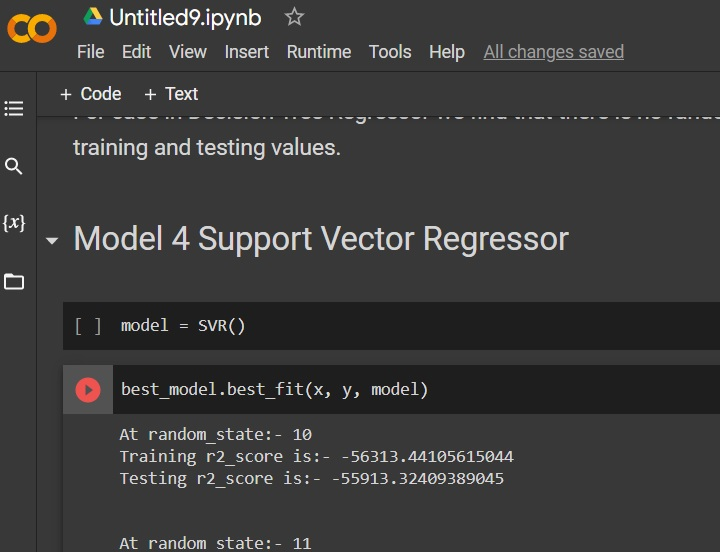

### Above information taken from google collab as jupyter notebook takes so much time to execute.

#### For case in Support Vector Regressor we find that there is no random state value in which accuracy_score seems equals to training and testing values.

# Model 5 KNeighbor Regressor

In [162]:
model = KNeighborsRegressor()

In [167]:
for i in [101,105,110,120,150]:
    best_model.final_model(x, y, model, i)

At random state 101 model giving best accuracy score 

Training accuracy:-  83.84036966073765
Testing accuracy:-  71.92199108444379


--------------------------------------
Mean squared error:-  0.032760155196828095
Mean absolute error:-  0.1321648258283772
Root Mean squared error:- 0.18099766627453542
At random state 105 model giving best accuracy score 

Training accuracy:-  83.7866639434023
Testing accuracy:-  73.75010533145459


--------------------------------------
Mean squared error:-  0.03020620900594732
Mean absolute error:-  0.12879920702350608
Root Mean squared error:- 0.17379933545887719
At random state 110 model giving best accuracy score 

Training accuracy:-  84.20594676320448
Testing accuracy:-  70.5864450401463


--------------------------------------
Mean squared error:-  0.033171967148116675
Mean absolute error:-  0.1319139054092325
Root Mean squared error:- 0.18213173020678378
At random state 120 model giving best accuracy score 

Training accuracy:-  84.27703573646

#### For case in Kneighbors Regressor we find that there is no random state value in which accuracy_score seems equals to training and testing values.

In [168]:
best_model.cross_val_score(model, x, y)  

cross_val_score -228.27122863231878 at cv = 2
cross_val_score -28.299700730857214 at cv = 3
cross_val_score -6.34489452805021 at cv = 4
cross_val_score 14.984434649587797 at cv = 5
cross_val_score 11.380175392314223 at cv = 6
cross_val_score 16.283328236898186 at cv = 7
cross_val_score 14.557478282371136 at cv = 8
cross_val_score 18.59928122767473 at cv = 9
cross_val_score 15.939515475363484 at cv = 10
cross_val_score 17.598070665429315 at cv = 11
cross_val_score 17.800759848276236 at cv = 12
cross_val_score 20.135863174553194 at cv = 13
cross_val_score 17.768444881607653 at cv = 14


#### 

## Finalizing best model

In [169]:
# models                            R2_score score     CV score        CV state    Mean Squared Error

# Linear Regression                 51.25151869835576  34.860141088916016    9      0.049418106998263926
# Ridge  Regression                 51.90589414403151  37.55879367775105     5      0.04826206117677097         

#Rest of the model not show training and testing accuracy similar

#### As per dataset we find that there are so many outliers present in the dataset.

From above model we find that Ridge Regression showing some good result then Linear Regression hence we are considering it.

### Using Ensemble Method Hyper Parameter Tuning for enhancing the accuracy score of Ridge Regression

## Hyper Parameter Tuning

In [179]:
model = Ridge()
# using hyper parameter tuning for Ridge regression to find out best criterion

# param (alpha=1.0, fit_intercept=True, normalize='deprecated', copy_X=True, max_iter=None, tol=0.001, solver='auto', positive=False,
# random_state=None,)

# checking above params takes too much time hence boolean type params not captured.

param = {"alpha": [0.1, 0.01, 0.001, 1, 0.5], 'max_iter': [100,200,300], 'tol': [.0001, .0002, .0003, .0004],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}


gd = GridSearchCV(model, param_grid=param, cv = 5)
gd.fit(x, y)
gd.best_params_

# {'alpha': 1, 'max_iter': 100, 'solver': 'sparse_cg', 'tol': 0.0004}

{'alpha': 1, 'max_iter': 100, 'solver': 'sparse_cg', 'tol': 0.0004}

In [181]:
final_model = Ridge(alpha=1, max_iter=100, solver='sparse_cg', tol=0.0004)

In [192]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 79)
final_model.fit(x_train, y_train)
pred_train = final_model.predict(x_train)
pred_test = final_model.predict(x_test)
print("At random state", 79 , "model giving best accuracy score","\n")
Test_accuracy = r2_score(pred_test, y_test)
print('Testing accuracy:- ', Test_accuracy*100)
print("\n")
print('--------------------------------------')
print('Mean squared error:- ', mean_squared_error(pred_test, y_test) )
print('Mean absolute error:- ', mean_absolute_error(pred_test, y_test) )
print('Root Mean squared error:-',np.sqrt(mean_squared_error(pred_test, y_test)))
        

At random state 79 model giving best accuracy score 

Testing accuracy:-  51.912514983799326


--------------------------------------
Mean squared error:-  0.04824798274971328
Mean absolute error:-  0.16898014909675668
Root Mean squared error:- 0.21965423453626676


In [193]:
cv = cross_val_score(final_model, x, y, cv = 5).mean()
print('cross_val_score', cv*100,'at cv =', 5)   # best CV score at 5 state hence we are considering it.

cross_val_score 37.59307954965766 at cv = 5


#### Checking Coefficient of the model

<AxesSubplot:title={'center':'Coefficient'}>

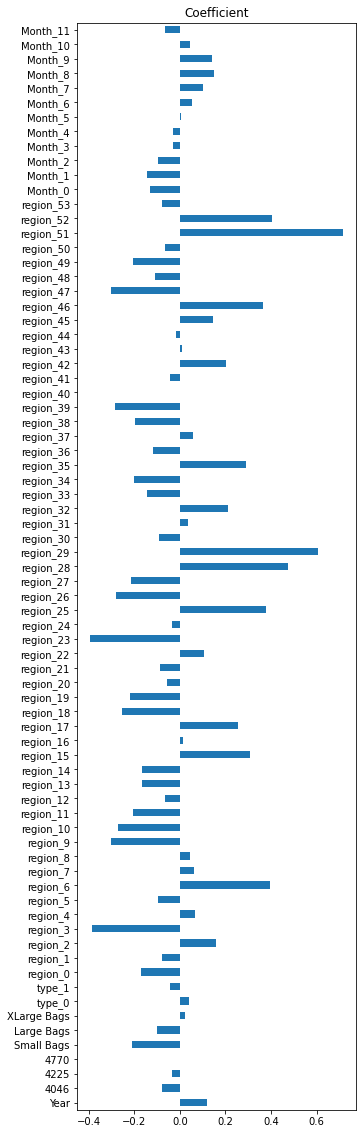

In [210]:
coef_final_model = pd.Series(final_model.coef_, x.columns)
coef_final_model.sort_values()
plt.figure(figsize = (5,20))
coef_final_model.plot(kind = 'barh', title = 'Coefficient')

## Checking Performance with Graph

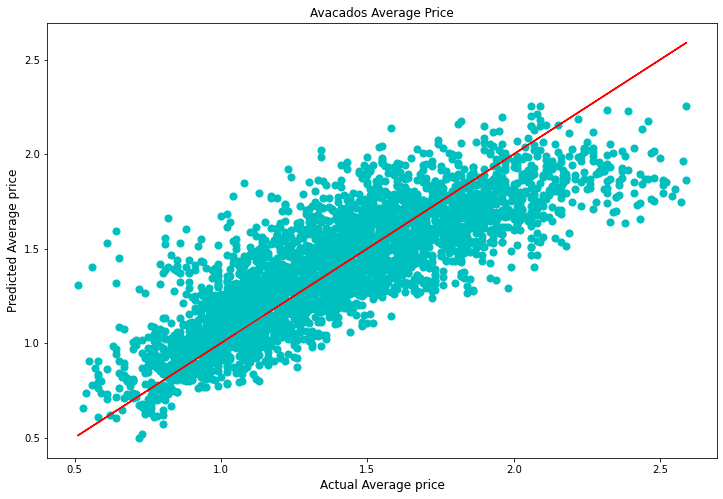

In [194]:
final_pred = final_model.predict(x_test)
plt.figure(figsize = (12, 8))
plt.scatter(x = y_test, y  = final_pred, color = 'c', s = 50)
plt.plot(y_test, y_test, color = 'r')
plt.xlabel('Actual Average price', fontsize = 12)
plt.ylabel('Predicted Average price', fontsize = 12)
plt.title('Avacados Average Price')
plt.show()

### Deploy Model

In [195]:
import pickle

filename = "averageprice.pkl"
pickle.dump(final_model, open(filename, 'wb'))

### Loading Model

In [196]:
load = pickle.load(open('averageprice.pkl', 'rb'))
result = load.score(x_test, y_test)
print(result)

0.6735897725178235


### Conclusion

In [197]:
conclusion = pd.DataFrame()
conclusion['Predicted Average price'] = np.array(final_model.predict(x_test))
conclusion['Actual Average price'] = np.array(y_test)

In [198]:
conclusion.head(50)

Predicted Average price  Actual Average price
0                  1.188974                  1.05
1                  0.928170                  1.00
2                  1.445470                  1.35
3                  1.791595                  1.47
4                  0.993774                  1.03
5                  1.379547                  1.48
6                  1.314083                  1.71
7                  1.527188                  1.63
8                  1.162734                  1.27
9                  1.324035                  1.39
10                 1.511676                  1.82
11                 1.122136                  1.06
12                 1.276214                  1.37
13                 0.791034                  0.76
14                 1.059978                  0.98
15                 1.224706                  1.18
16                 1.520235                  1.37
17                 1.124228                  0.95
18                 1.567499                  1.38
19                 1.368320                  1.21
20                 1.196819                  1.22
21                 1.790772                  1.67
22                 0.977338                  0.94
23                 1.100443                  1.05
24                 1.801029                  1.85
25                 1.716673                  1.65
26                 1.425890                  1.45
27                 1.110337                  1.48
28                 1.289044                  1.41
29                 0.942126                  0.98
30                 1.127316                  1.19
31                 1.163887                  1.24
32                 1.487059                  1.40
33                 1.210937                  1.31
34                 1.682780                  1.85
35                 1.868353                  1.94
36                 1.192721                  1.38
37                 1.985859                  1.96
38                 1.565719                  1.35
39                 1.838012                  1.87
40                 1.572974                  1.48
41                 1.676013                  2.08
42                 1.481799                  1.75
43                 1.340791                  1.55
44                 1.407654                  1.34
45                 1.584224                  1.47
46                 1.388936                  1.49
47                 0.714875                  0.71
48                 1.667491                  2.12
49                 1.093981                  1.11

#### 

# Classification Model

In [39]:
df2.head() # from above we copied df to df2

Month  Year  Total Volume     4046       4225    4770  Total Bags  \
0    12  2015      64236.62  1036.74   54454.85   48.16     8696.87   
1    12  2015      54876.98   674.28   44638.81   58.33     9505.56   
2    12  2015     118220.22   794.70  109149.67  130.50     8145.35   
3    12  2015      78992.15  1132.00   71976.41   72.58     5811.16   
4    11  2015      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  region  AveragePrice  
0     8603.62       93.25          0.0  conventional  Albany          1.33  
1     9408.07       97.49          0.0  conventional  Albany          1.35  
2     8042.21      103.14          0.0  conventional  Albany          0.93  
3     5677.40      133.76          0.0  conventional  Albany          1.08  
4     5986.26      197.69          0.0  conventional  Albany          1.28

## Converting Categorical Dataset to Machine Understandable Form using Label Encoder

In [40]:
from sklearn.preprocessing import LabelEncoder
lec = LabelEncoder()
for i in df2.columns:
    if df2[i].dtypes == 'object':
        df2[i] = lec.fit_transform(df2[i].values.reshape(-1,1))

In [41]:
df2.sample(5)  #Checking result of label encoder

Month  Year  Total Volume       4046       4225      4770  Total Bags  \
5708       3  2017     481933.74  226289.90   48770.22    139.77   206733.85   
10031      7  2015       2676.30      82.67    2503.23      1.36       89.04   
13505      9  2016      12400.93       0.00     173.16      0.00    12227.77   
3475       1  2016    1058089.41  118099.68  300335.55  62908.07   576746.11   
1780       9  2015      89538.02    1068.04   69555.83   2321.10    16593.05   

       Small Bags  Large Bags  XLarge Bags  type  region  AveragePrice  
5708    150546.84    52857.01      3330.00     0       1          1.26  
10031       89.04        0.00         0.00     1      17          2.42  
13505    12227.77        0.00         0.00     1      30          1.58  
3475     43136.98   533591.97        17.16     0      12          0.74  
1780     13300.88     3292.17         0.00     0      34          0.99

### Using Get Dummies Method to prevent overfitting of Model as Model having so many columns with Multiple Unique Values

In [42]:
df2 = pd.get_dummies(data = df2, columns = ['type','Month'])

In [43]:
df2.shape

(18249, 25)

## Checking Correlation with respect to new target variable

In [44]:
df2.corr()

Year  Total Volume      4046      4225      4770  \
Year          1.000000      0.017193  0.003353 -0.009559 -0.036531   
Total Volume  0.017193      1.000000  0.977863  0.974181  0.872202   
4046          0.003353      0.977863  1.000000  0.926110  0.833389   
4225         -0.009559      0.974181  0.926110  1.000000  0.887855   
4770         -0.036531      0.872202  0.833389  0.887855  1.000000   
Total Bags    0.071552      0.963047  0.920057  0.905787  0.792314   
Small Bags    0.063915      0.967238  0.925280  0.916031  0.802733   
Large Bags    0.087891      0.880640  0.838645  0.810015  0.698471   
XLarge Bags   0.081033      0.747157  0.699377  0.688809  0.679861   
region       -0.000055      0.174176  0.192073  0.145726  0.095252   
AveragePrice  0.093197     -0.192752 -0.208317 -0.172928 -0.179446   
type_0        0.000032      0.232434  0.225819  0.232289  0.210027   
type_1       -0.000032     -0.232434 -0.225819 -0.232289 -0.210027   
Month_0       0.129350      0.005291  0.001115  0.009508  0.002024   
Month_1       0.121153      0.015750  0.016277  0.014344  0.016719   
Month_2       0.093894      0.003279  0.003273 -0.000181  0.006575   
Month_3      -0.021801      0.002470  0.004950 -0.000825  0.008233   
Month_4      -0.070136      0.010624  0.013529  0.010365  0.015490   
Month_5      -0.043925      0.006295  0.009609  0.001610  0.015711   
Month_6      -0.024453      0.000731 -0.000181 -0.000110  0.004705   
Month_7      -0.069056     -0.003926 -0.000546 -0.003067 -0.008663   
Month_8      -0.043507     -0.007792 -0.007529 -0.004465 -0.013931   
Month_9      -0.024453     -0.014817 -0.018323 -0.010934 -0.015830   
Month_10     -0.069056     -0.014298 -0.014393 -0.013040 -0.018464   
Month_11     -0.021557     -0.006352 -0.009734 -0.006178 -0.015464   

              Total Bags  Small Bags  Large Bags  XLarge Bags    region  \
Year            0.071552    0.063915    0.087891     0.081033 -0.000055   
Total Volume    0.963047    0.967238    0.880640     0.747157  0.174176   
4046            0.920057    0.925280    0.838645     0.699377  0.192073   
4225            0.905787    0.916031    0.810015     0.688809  0.145726   
4770            0.792314    0.802733    0.698471     0.679861  0.095252   
Total Bags      1.000000    0.994335    0.943009     0.804233  0.175256   
Small Bags      0.994335    1.000000    0.902589     0.806845  0.164702   
Large Bags      0.943009    0.902589    1.000000     0.710858  0.198768   
XLarge Bags     0.804233    0.806845    0.710858     1.000000  0.082281   
region          0.175256    0.164702    0.198768     0.082281  1.000000   
AveragePrice   -0.177088   -0.174730   -0.172940    -0.117592 -0.011716   
type_0          0.217788    0.220535    0.193177     0.175483  0.000280   
type_1         -0.217788   -0.220535   -0.193177    -0.175483 -0.000280   
Month_0         0.005271    0.003939    0.010373    -0.015329  0.000097   
Month_1         0.014939    0.013376    0.019297     0.002564  0.000090   
Month_2         0.006789    0.008568    0.001116     0.001724  0.000093   
Month_3         0.002412    0.002891    0.001625    -0.009862  0.000081   
Month_4         0.005508    0.004524    0.008386     0.000592  0.000084   
Month_5         0.006042    0.007597   -0.001268     0.033886 -0.000649   
Month_6         0.002414    0.004471   -0.008017     0.056522  0.000084   
Month_7        -0.008357   -0.006168   -0.015461     0.007500  0.000081   
Month_8        -0.010659   -0.010420   -0.010213    -0.013896  0.000077   
Month_9        -0.013311   -0.014691   -0.006945    -0.026613  0.000084   
Month_10       -0.013676   -0.015178   -0.006918    -0.026810  0.000081   
Month_11       -0.000530   -0.001853    0.004153    -0.008643 -0.000269   

              AveragePrice    type_0    type_1   Month_0   Month_1   Month_2  \
Year              0.093197  0.000032 -0.000032  0.129350  0.121153  0.093894   
Total Volume     -0.192752  0.232434 -0.232434  0.005291  0.015750  0.003279   
4046  

<AxesSubplot:>

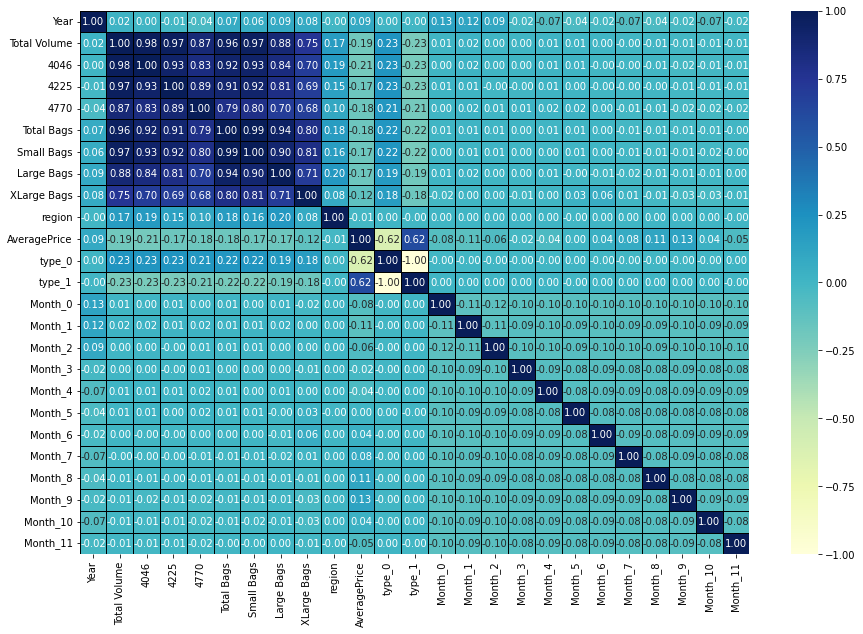

In [45]:
plt.figure(figsize = (15,10))
sns.heatmap(df2.corr(), annot = True, linecolor = 'black', linewidths = 1, fmt = '.2f', cmap="YlGnBu" )

#### Observations: 

'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags' are highly correlated with each other.

Average prices shows negative correlation with most of the dataset like 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags. 

## Checking Positive and Negative Correlation with the dataset

<AxesSubplot:>

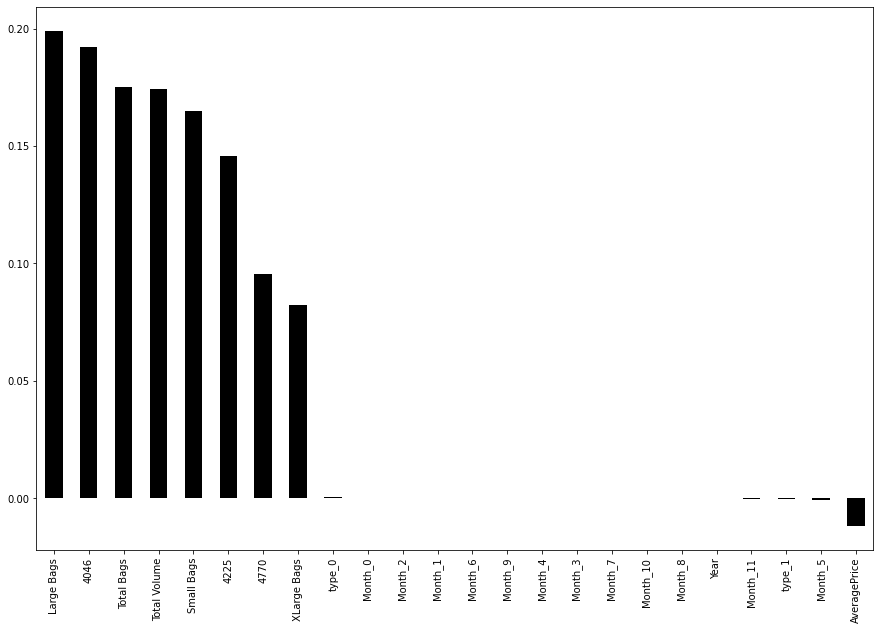

In [46]:
plt.figure(figsize = (15,10))
df2.corr()['region'].sort_values(ascending = False).drop(['region']).plot(kind = 'bar', color = 'k')

#### 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags, Xlarge Bags shows positive correlation towards target variable rest average price shows negative correlation.

## Removing Outliers from the Dataset

In [47]:
from scipy.stats import zscore

z = np.abs(zscore(df2[df_continuos]))

# taking thresold value = 3
#np.where(z>3)

df_new_2 = df2[(z<3).all(axis = 1)]

In [48]:
print(df_new_2.shape)
print(df2.shape)
# (17289, 14)
# (17788, 14)

(17651, 25)
(18249, 25)


## Percentage of Data Loss

In [49]:
print('Percentage of Data Loss', (18249-17651)/18249*100)

Percentage of Data Loss 3.276891884486821


## Removing Outliers with Interquartile Method

In [50]:
Q1 = df2[df_continuos].quantile(.25)
Q3 = df2[df_continuos].quantile(.75)
IQR = Q3 - Q1

In [51]:
df_IQR_2 = df2[~((df2[df_continuos]<(Q1 - 1.5*IQR)) | (df2[df_continuos]>(Q3 + 1.5*IQR))).any(axis = 1)]

In [52]:
df_IQR_2.shape

(11538, 25)

## Percentage of Data Loss

In [53]:
print('Percentage of Data Loss', (18249-11538)/18249*100)

Percentage of Data Loss 36.774617787276014


### By using Interquartile Method we find that heavy data loss taken upto 36.77 percent hence we are considering Zscore method for removing outliers.

#### 

## Checking Outliers after removal

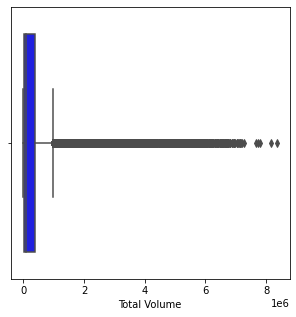

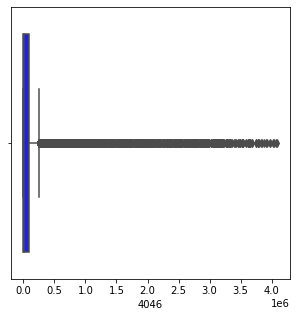

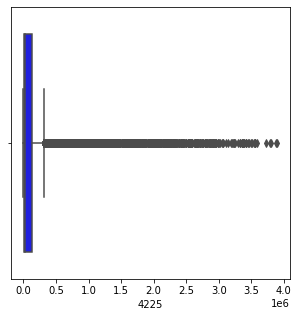

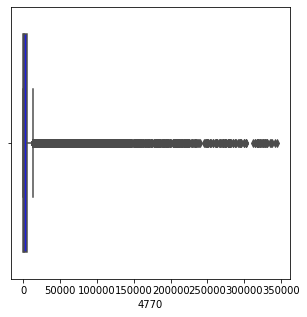

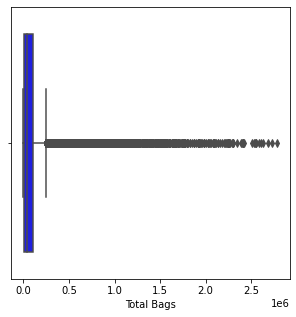

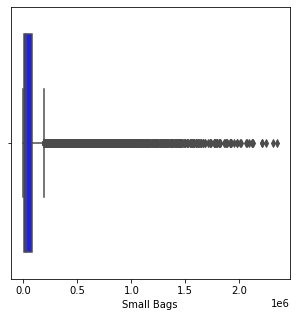

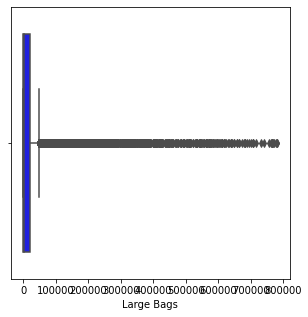

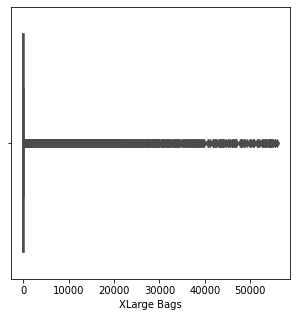

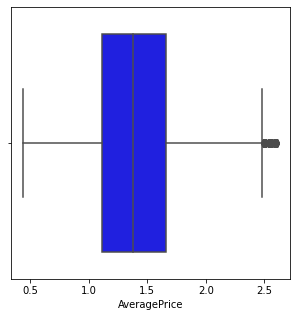

In [54]:
for i in df_new_2[df_continuos]:
    plt.figure(figsize = (5,5))
    sns.boxplot(df_new_2[i], orient='v', color='blue')

### We find that some of the outliers are removed from the previous outliers observations. 

#### 

# Removing Skewness

In [55]:
from sklearn.preprocessing import PowerTransformer
pw = PowerTransformer('yeo-johnson')

In [56]:
skew_col = ['Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags', 'XLarge Bags','AveragePrice']

In [57]:
df_new_2[skew_col].skew()  # checking skewness

Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
AveragePrice    0.377432
dtype: float64

In [58]:
df_new_2[skew_col] = pw.fit_transform(df_new_2[skew_col])
df_new_2[skew_col].skew()

Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
AveragePrice    0.000464
dtype: float64

<Figure size 72x36 with 0 Axes>

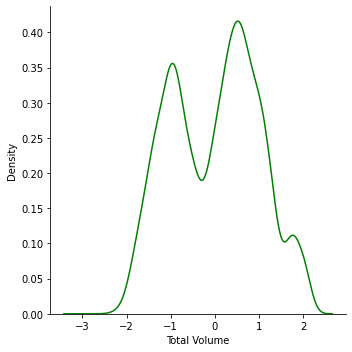

<Figure size 72x36 with 0 Axes>

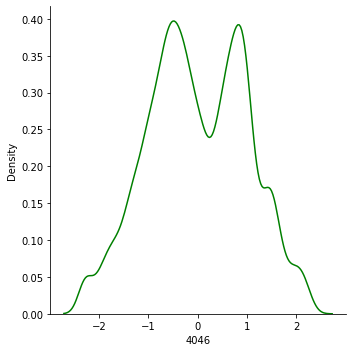

<Figure size 72x36 with 0 Axes>

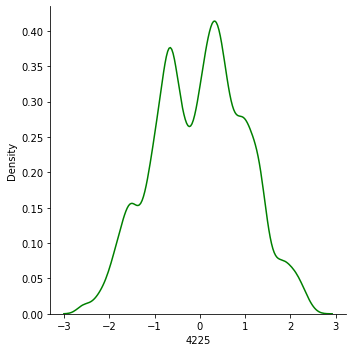

<Figure size 72x36 with 0 Axes>

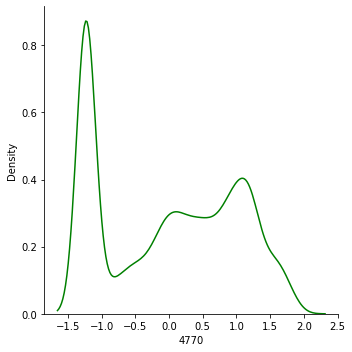

<Figure size 72x36 with 0 Axes>

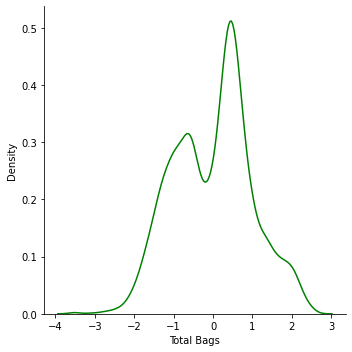

<Figure size 72x36 with 0 Axes>

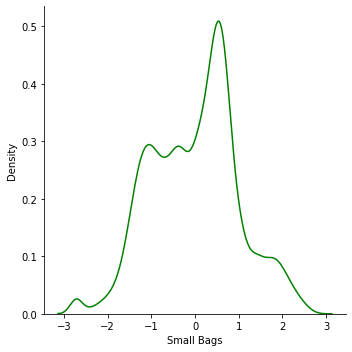

<Figure size 72x36 with 0 Axes>

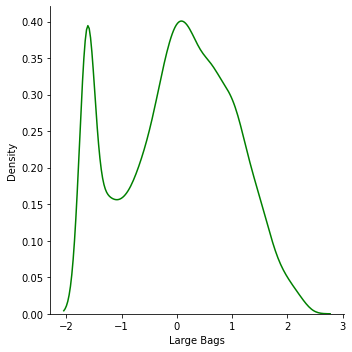

<Figure size 72x36 with 0 Axes>

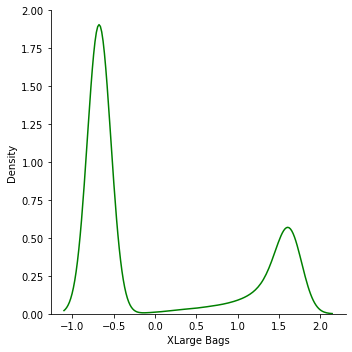

<Figure size 72x36 with 0 Axes>

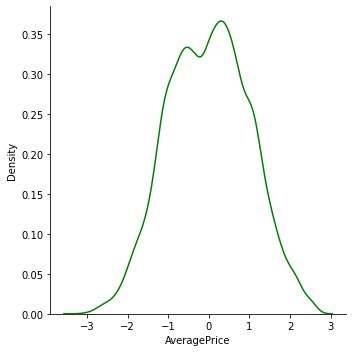

In [59]:
for i in df_new_2[skew_col]:
    plt.figure(figsize = (1,0.5))
    sns.displot(df_new_2[i], kind = 'kde', color = 'green')

#### 

# Dividing data for feature selection

In [60]:
x2 = df_new_2.drop(['region'], axis = 1)
y2 = df_new_2['region']

In [61]:
x2.shape

(17651, 24)

In [62]:
x2.head(1)

Year  Total Volume      4046     4225      4770  Total Bags  Small Bags  \
0  2015     -0.075324 -0.657421  0.35143 -0.222566   -0.537507   -0.347421   

   Large Bags  XLarge Bags  AveragePrice  type_0  type_1  Month_0  Month_1  \
0   -0.781153    -0.677919     -0.117824       1       0        0        0   

   Month_2  Month_3  Month_4  Month_5  Month_6  Month_7  Month_8  Month_9  \
0        0        0        0        0        0        0        0        0   

   Month_10  Month_11  
0         0         1

In [63]:
y2.shape

(17651,)

## Checking multicolinearity of the dataset

In [64]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
def calc_vif(x2):
    
    vif = pd.DataFrame()
    vif['Variance'] = x2.columns
    vif["VIF Factor"] = [variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])]
    return vif

In [66]:
calc_vif(x2)

Variance  VIF Factor
0           Year    1.598196
1   Total Volume   55.060733
2           4046    6.919381
3           4225   12.514102
4           4770    3.969775
5     Total Bags   36.236459
6     Small Bags   17.491281
7     Large Bags    3.484842
8    XLarge Bags    2.110654
9   AveragePrice    2.474768
10        type_0         inf
11        type_1         inf
12       Month_0         inf
13       Month_1         inf
14       Month_2         inf
15       Month_3         inf
16       Month_4         inf
17       Month_5         inf
18       Month_6         inf
19       Month_7         inf
20       Month_8         inf
21       Month_9         inf
22      Month_10         inf
23      Month_11         inf

#### From above code we find that Total Volume, Total bags and small bags shows high multicollinearity towards dataset hence we need to remove it.

#### But for the less no. of columns we need to remove it one by one after checking affect on new VIF as per correlation of the dataset Total Volume, avacado types and all bags are highly correlated with each others.

### We are dropping first Total Volume

In [67]:
x2.drop(['Total Volume'], axis = 1, inplace = True)

In [68]:
calc_vif(x2)

Variance  VIF Factor
0           Year    1.597754
1           4046    3.620776
2           4225    4.687992
3           4770    3.959867
4     Total Bags   27.174558
5     Small Bags   17.474558
6     Large Bags    3.433748
7    XLarge Bags    2.096426
8   AveragePrice    2.408872
9         type_0         inf
10        type_1         inf
11       Month_0         inf
12       Month_1         inf
13       Month_2         inf
14       Month_3         inf
15       Month_4         inf
16       Month_5         inf
17       Month_6         inf
18       Month_7         inf
19       Month_8         inf
20       Month_9         inf
21      Month_10         inf
22      Month_11         inf

### Now we are dropping Total Bags

In [69]:
x2.drop(['Total Bags'], axis = 1, inplace = True)

In [70]:
calc_vif(x2)

Variance  VIF Factor
0           Year    1.515782
1           4046    3.616250
2           4225    4.373986
3           4770    3.959315
4     Small Bags    4.182343
5     Large Bags    2.081506
6    XLarge Bags    2.095488
7   AveragePrice    2.186569
8         type_0         inf
9         type_1         inf
10       Month_0         inf
11       Month_1         inf
12       Month_2         inf
13       Month_3         inf
14       Month_4         inf
15       Month_5         inf
16       Month_6         inf
17       Month_7         inf
18       Month_8         inf
19       Month_9         inf
20      Month_10         inf
21      Month_11         inf

### As per limited dataset columns we find that VIF are now in acceptable zone.

# S M O T E

<AxesSubplot:xlabel='region', ylabel='count'>

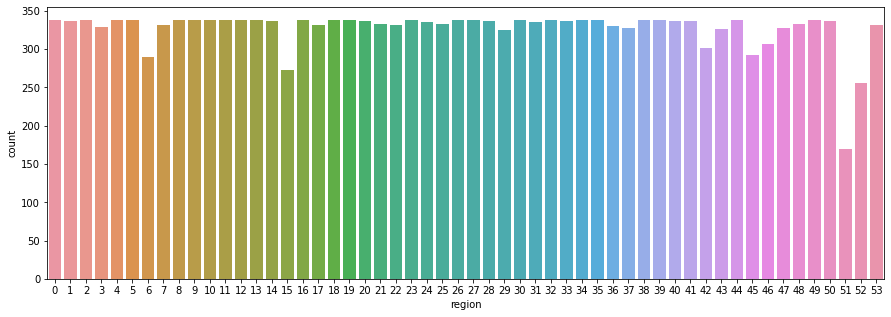

In [71]:
plt.figure(figsize = (15,5))
sns.countplot(y2)

### Using SMOTE to balance the dataset

In [72]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [73]:
x2, y2 = sm.fit_resample(x2, y2)

<AxesSubplot:xlabel='region', ylabel='count'>

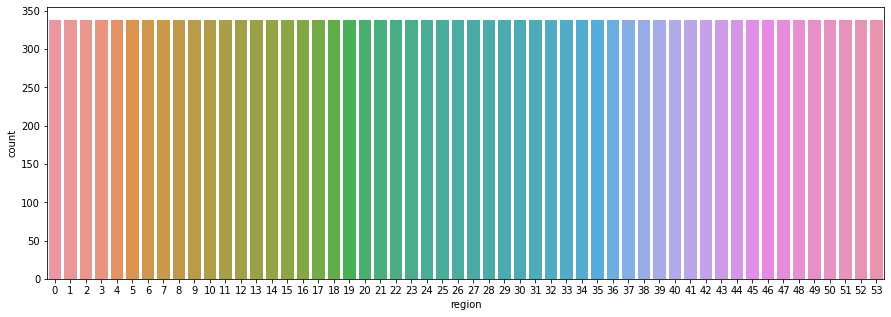

In [74]:
plt.figure(figsize = (15,5))
sns.countplot(y2)

## Standard Scalling

In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [76]:
x_new_2 = ['4046','4225','4770','Small Bags' ,'Large Bags', 'XLarge Bags', 'AveragePrice']

In [77]:
x2[x_new_2] = sc.fit_transform(x2[x_new_2])

In [78]:
x2.head(5)

Year      4046      4225      4770  Small Bags  Large Bags  XLarge Bags  \
0  2015 -0.678469  0.326276 -0.233556   -0.368381   -0.798923     -0.67861   
1  2015 -0.797984  0.244622 -0.186286   -0.332643   -0.789072     -0.67861   
2  2015 -0.752674  0.623226  0.012554   -0.395143   -0.776528     -0.67861   
3  2015 -0.653690  0.443270 -0.132310   -0.530316   -0.717744     -0.67861   
4  2015 -0.705497  0.237258 -0.121653   -0.510064   -0.626602     -0.67861   

   AveragePrice  type_0  type_1  Month_0  Month_1  Month_2  Month_3  Month_4  \
0     -0.122810       1       0        0        0        0        0        0   
1     -0.069193       1       0        0        0        0        0        0   
2     -1.306554       1       0        0        0        0        0        0   
3     -0.835640       1       0        0        0        0        0        0   
4     -0.258932       1       0        0        0        0        0        0   

   Month_5  Month_6  Month_7  Month_8  Month_9  Month_10  Month_11  
0        0        0        0        0        0         0         1  
1        0        0        0        0        0         0         1  
2        0        0        0        0        0         0         1  
3        0        0        0        0        0         0         1  
4        0        0        0        0        0         1         0

## Feature Selection

### Since output variables having categorial variables hence we use classification model

In [79]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [80]:
class best_model:
    def best_fit(x2, y2, model):
        random_state_values = []
        for i in range(0, 100):
            x_train, x_test, y_train, y_test = train_test_split(x2, y2, random_state = i, test_size = 0.20)
            model.fit(x_train, y_train)
            pred_train = model.predict(x_train)
            pred_test = model.predict(x_test)

            if round(accuracy_score(y_train, pred_train)*100,1) == round(accuracy_score(y_test, pred_test)*100,1):
                print("At random_state:-", i)
                print("Training accuracy_score is:-", accuracy_score(pred_train, y_train)*100)
                print("Testing accuracy_score is:-", accuracy_score(pred_test, y_test)*100)
                print("\n")
                random_state_values.append(i)
        print("Best fit random_state_values", random_state_values)
    
    
    def final_model(x2, y2, model, i):
        x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.20, random_state = i)
        model.fit(x_train, y_train)
        pred_train = model.predict(x_train)
        pred_test = model.predict(x_test)
        print("At random state", i , "model giving best accuracy score","\n")
        Train_accuracy = accuracy_score(pred_train, y_train)
        Test_accuracy = accuracy_score(pred_test, y_test)
        print('Training accuracy:- ', Train_accuracy*100)
        print('Testing accuracy:- ', Test_accuracy*100)
        print("\n")
        print('--------------------------------------')
        print('Confusion Matrix')
        print(confusion_matrix(pred_test, y_test) )
        print("\n")
        print('Classification Report')
        print(classification_report(pred_test, y_test) )
        

    def cross_val_score(model, x2, y2):
        for value in range(2,8):
            cv = cross_val_score(model, x2, y2, cv = value).mean()
            print('cross_val_score', cv*100,'at cv =', value,"\n")


## Model 1 Logisitc Regression

In [99]:
model = LogisticRegression()

In [100]:
#best_model.best_fit(x2, y2, model)   #finding best random state

#it takes so much time hence selecting some random variables

In [101]:
for i in [50,60,80,99]:
            x_train, x_test, y_train, y_test = train_test_split(x2, y2, random_state = i, test_size = 0.20)
            model.fit(x_train, y_train)
            pred_train = model.predict(x_train)
            pred_test = model.predict(x_test)
            print("At random_state:-", i)
            print("Training accuracy_score is:-", accuracy_score(pred_train, y_train)*100)
            print("Testing accuracy_score is:-", accuracy_score(pred_test, y_test)*100)
            print("\n")

At random_state:- 50
Training accuracy_score is:- 32.148482980617764
Testing accuracy_score is:- 29.115310873733225


At random_state:- 60
Training accuracy_score is:- 28.504896924868163
Testing accuracy_score is:- 26.759791837852642


At random_state:- 80
Training accuracy_score is:- 32.67584412026574
Testing accuracy_score is:- 30.210901122980005


At random_state:- 99
Training accuracy_score is:- 31.81973837408397
Testing accuracy_score is:- 31.005204053683922




In [103]:
best_model.final_model(x2, y2, model, 99)  # at random state 99 model giving best similar accuracy score

At random state 99 model giving best accuracy score 

Training accuracy:-  31.81973837408397
Testing accuracy:-  31.005204053683922


--------------------------------------
Confusion Matrix
[[19  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  4]
 [ 0  0 20 ...  0  0  1]
 ...
 [ 0  0  0 ... 67  7  0]
 [ 0  0  0 ...  3 49  0]
 [ 0  1  0 ...  0  0  3]]


Classification Report
              precision    recall  f1-score   support

           0       0.29      0.21      0.25        89
           1       0.22      0.11      0.14       111
           2       0.31      0.36      0.33        55
           3       0.25      0.25      0.25        72
           4       0.33      0.28      0.30        71
           5       0.03      0.06      0.04        35
           6       0.69      0.53      0.60        88
           7       0.60      0.28      0.38       111
           8       0.50      0.46      0.48        71
           9       0.28      0.22      0.25        85
          10       0.03      0.10  

In [104]:
best_model.cross_val_score(model, x2, y2)

cross_val_score 6.865001095770326 at cv = 2 

cross_val_score 17.65285996055227 at cv = 3 

cross_val_score 19.14310760464607 at cv = 4 

cross_val_score 21.154171309793153 at cv = 5 

cross_val_score 21.86609686609686 at cv = 6 

cross_val_score 24.41988165079724 at cv = 7 



#### 

## Model 2 Decision Tree Classifier

In [105]:
model = DecisionTreeClassifier()

In [106]:
# best_model.best_fit(x, y, model)  #finding best random state

# #it takes so much time hence selecting some random variables

In [107]:
for i in [55,60,79,129]:
            x_train, x_test, y_train, y_test = train_test_split(x2, y2, random_state = i, test_size = 0.20)
            model.fit(x_train, y_train)
            pred_train = model.predict(x_train)
            pred_test = model.predict(x_test)
            print("At random_state:-", i)
            print("Training accuracy_score is:-", accuracy_score(pred_train, y_train)*100)
            print("Testing accuracy_score is:-", accuracy_score(pred_test, y_test)*100)
            print("\n")

At random_state:- 55
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 79.29334428923582


At random_state:- 60
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 80.936729663106


At random_state:- 79
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 79.92330868255273


At random_state:- 129
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 79.56724185154752




In [108]:
best_model.final_model(x2, y2, model, 60)   # at random state 60 model giving best accuracy score

At random state 60 model giving best accuracy score 

Training accuracy:-  100.0
Testing accuracy:-  80.85456039441249


--------------------------------------
Confusion Matrix
[[59  0  0 ...  0  0  0]
 [ 0 54  0 ...  0  0  1]
 [ 0  0 64 ...  0  0  0]
 ...
 [ 0  0  0 ... 59  0  0]
 [ 0  0  0 ...  0 74  0]
 [ 0  0  1 ...  0  0 45]]


Classification Report
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        67
           1       0.73      0.68      0.71        79
           2       0.96      0.94      0.95        68
           3       0.77      0.85      0.81        68
           4       0.84      0.87      0.86        62
           5       0.81      0.83      0.82        63
           6       0.88      0.98      0.93        62
           7       0.90      0.93      0.92        58
           8       0.91      0.99      0.94        78
           9       0.78      0.82      0.80        60
          10       0.66      0.69      0.68     

In [109]:
best_model.cross_val_score(model, x2, y2)

cross_val_score 15.992767915844839 at cv = 2 

cross_val_score 49.128862590401056 at cv = 3 

cross_val_score 53.002410694718385 at cv = 4 

cross_val_score 58.03700843829615 at cv = 5 

cross_val_score 57.840236686390526 at cv = 6 

cross_val_score 62.43637982348474 at cv = 7 



#### 

## Model 3 KNeighbors Classifier

In [110]:
model = KNeighborsClassifier()

In [111]:
#best_model.best_fit(x2, y2, model)

#it takes so much time hence selecting some random variables

In [116]:
for i in [59,62,79,132]:
            x_train, x_test, y_train, y_test = train_test_split(x2, y2, random_state = i, test_size = 0.20)
            model.fit(x_train, y_train)
            pred_train = model.predict(x_train)
            pred_test = model.predict(x_test)
            print("At random_state:-", i)
            print("Training accuracy_score is:-", accuracy_score(pred_train, y_train)*100)
            print("Testing accuracy_score is:-", accuracy_score(pred_test, y_test)*100)
            print("\n")

At random_state:- 59
Training accuracy_score is:- 80.69310321210877
Testing accuracy_score is:- 56.231169542591076


At random_state:- 62
Training accuracy_score is:- 80.05616053694953
Testing accuracy_score is:- 55.68337441796768


At random_state:- 79
Training accuracy_score is:- 79.80275323607971
Testing accuracy_score is:- 56.4776773486716


At random_state:- 132
Training accuracy_score is:- 80.04931169098008
Testing accuracy_score is:- 56.58723637359627




In [114]:
best_model.final_model(x2, y2, model, 59)  # at random state 59 model giving best accuracy score

At random state 59 model giving best accuracy score 

Training accuracy:-  80.69310321210877
Testing accuracy:-  56.231169542591076


--------------------------------------
Confusion Matrix
[[42  0  0 ...  0  0  0]
 [ 0 39  0 ...  0  0  1]
 [ 0  0 61 ...  0  0  1]
 ...
 [ 0  0  0 ... 63  0  0]
 [ 0  0  0 ...  0 61  0]
 [ 0  1  0 ...  0  0 33]]


Classification Report
              precision    recall  f1-score   support

           0       0.74      0.45      0.56        93
           1       0.57      0.38      0.46       103
           2       0.81      0.61      0.70       100
           3       0.47      0.67      0.56        52
           4       0.73      0.55      0.63        98
           5       0.52      0.40      0.45        70
           6       0.80      0.67      0.73        82
           7       0.58      0.41      0.48        95
           8       0.82      0.72      0.77        69
           9       0.50      0.42      0.46        86
          10       0.43      0.33  

In [117]:
best_model.cross_val_score(model, x2, y2)

cross_val_score 12.1301775147929 at cv = 2 

cross_val_score 32.37453429761122 at cv = 3 

cross_val_score 36.806925268463736 at cv = 4 

cross_val_score 40.417046183631435 at cv = 5 

cross_val_score 38.46701731317116 at cv = 6 

cross_val_score 40.03333277863448 at cv = 7 



#### 

## Model 4 Random Forest Classifier

In [82]:
model = RandomForestClassifier()

In [119]:
# best_model.best_fit(x2, y2, model)  #finding best random state

# #it takes so much time hence selecting some random variables

In [120]:
for i in [60,65,85,139]:
            x_train, x_test, y_train, y_test = train_test_split(x2, y2, random_state = i, test_size = 0.20)
            model.fit(x_train, y_train)
            pred_train = model.predict(x_train)
            pred_test = model.predict(x_test)
            print("At random_state:-", i)
            print("Training accuracy_score is:-", accuracy_score(pred_train, y_train)*100)
            print("Testing accuracy_score is:-", accuracy_score(pred_test, y_test)*100)
            print("\n")

At random_state:- 60
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 92.93344289235826


At random_state:- 65
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 92.02958093672966


At random_state:- 85
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 91.78307313064914


At random_state:- 139
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 92.02958093672966




In [121]:
best_model.final_model(x2, y2, model, 60)  # at random state 60 model giving best accuracy score

At random state 60 model giving best accuracy score 

Training accuracy:-  100.0
Testing accuracy:-  92.90605313612708


--------------------------------------
Confusion Matrix
[[73  0  0 ...  0  0  0]
 [ 0 64  0 ...  0  0  1]
 [ 0  0 66 ...  0  0  0]
 ...
 [ 0  0  0 ... 59  0  0]
 [ 0  0  0 ...  0 76  0]
 [ 0  1  0 ...  0  0 58]]


Classification Report
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        81
           1       0.86      0.86      0.86        74
           2       0.99      0.99      0.99        67
           3       0.88      0.97      0.92        68
           4       0.97      1.00      0.98        62
           5       0.92      0.91      0.91        65
           6       0.96      0.99      0.97        67
           7       0.97      0.95      0.96        61
           8       0.99      0.99      0.99        85
           9       0.87      0.92      0.89        60
          10       0.93      0.89      0.91     

In [131]:
best_model.cross_val_score(model, x2, y2)

cross_val_score 21.55928117466579 at cv = 2 

cross_val_score 58.08130615822923 at cv = 3 

cross_val_score 63.976550515012065 at cv = 4 

cross_val_score 68.66567012978241 at cv = 5 

cross_val_score 70.24435678281831 at cv = 6 

cross_val_score 77.05905475281105 at cv = 7 



#### Finalizing Model

In [122]:
# Model Observations
#                                     Training Acc.        Testing Acc.         CV       Difference btw training and testing acc
# 1. LogisticRegression                31.81               31.00             24.41           0.81
# 2. DecisionTreeClassifier           100.00               80.85             62.43           20.15        
# 3. KNeighborsClassifier              80.69               56.63             40.41           24.03
# 4. RandomForestClassifier           100.00               92.90             77.05           7.10

#From above information we find that.
# Logistic Regression gives lower accuracy but its difference between training and testing accuracy are very less. We can't
# consider it for model learning because its accuracy is very very low.
#

# DecisionTreeClassifier shows highest difference between all model of rate 22.08 which said that model is underfitted as per 
# testing and training accuracy hence we can't consider it.

# RandomForestClassifier show least difference apart from logistic regression of 9.12 also training and testing accuracy can
# be further improve by using ensemble hyper parameter tuning hence we can consider it for model learning.

# KNeighborsClassifier show very high difference btw training and testing hence we can't consider it for model learning.


# RandomForestclassifier selected as for model learning after using ensemble method.


#### 

## Final Model (RandomForestClassifier)

## Ensemble Technique

## Hyper Parameter Tuning

In [81]:
# using hyper parameter tuning for RandomForestClassifier to find out best criterion

# param = {criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
#  max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, 
#     class_weight=None, ccp_alpha=0.0, max_samples=None}


# checking above params takes too much time hence boolean type params not captured.

param = {'criterion' : ['gini', 'entropy'], 'max_features' : ['auto', 'sqrt', 'log2'],
             'bootstrap' : [True, False], 'n_estimators': [10, 50, 100], }

model = RandomForestClassifier()

gd = GridSearchCV(model, param_grid = param, cv = 7)
gd.fit(x2, y2)
gd.best_params_

#{'criterion': 'gini', 'n_jobs': 100, 'max_featurs': 'auto', 'bootstrap': 'False', 'n_estimators': 100}

{'criterion': 'gini', 'max_featurs': 'auto', 'bootstrap': 'False', 'n_estimators': 100}

In [86]:
model = RandomForestClassifier(criterion='gini', max_features='auto', bootstrap=False, n_estimators = 100)

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.20, random_state = 60)
model.fit(x_train, y_train)
pred_test = model.predict(x_test)
print("At random state", 60 , "model giving best accuracy score","\n")
Test_accuracy = accuracy_score(pred_test, y_test)
print('Testing accuracy:- ', Test_accuracy*100)
print("\n")
print('--------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(pred_test, y_test) )
print("\n")
print('Classification Report')
print(classification_report(pred_test, y_test) )   # at random state 60 model shows best accuracy

At random state 60 model giving best accuracy score 

Testing accuracy:-  93.64557655436867


--------------------------------------
Confusion Matrix
[[74  0  0 ...  0  0  0]
 [ 0 68  0 ...  0  0  1]
 [ 0  0 65 ...  0  0  0]
 ...
 [ 0  0  0 ... 59  1  0]
 [ 0  0  0 ...  0 75  0]
 [ 0  1  1 ...  0  0 58]]


Classification Report
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        80
           1       0.92      0.88      0.90        77
           2       0.97      0.98      0.98        66
           3       0.87      1.00      0.93        65
           4       0.98      0.98      0.98        64
           5       0.89      0.88      0.88        65
           6       0.99      1.00      0.99        68
           7       0.98      0.97      0.98        61
           8       0.99      0.99      0.99        85
           9       0.84      0.90      0.87        59
          10       0.93      0.88      0.90        75
          11       0.

#### Checking cross val score

In [83]:
cv = cross_val_score(model, x2, y2, cv = 7).mean()
print('cross_val_score', cv*100,'at cv =', 7  )

cross_val_score 77.39322089083291 at cv = 7


#### 

### Using Predict Proba function for finding accuracy of getting 1 (i.e Right regions)

In [104]:
final_pred_prob = model.predict_proba(x_test)[:, 1] # checking x_test

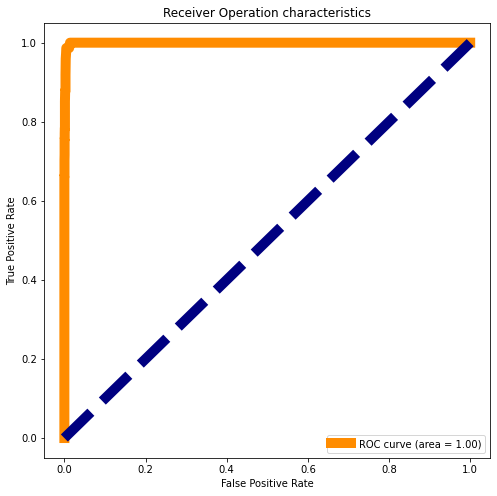

In [117]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresolds = roc_curve(y_test, final_pred_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (8,8))
plt.plot(fpr, tpr, color = 'darkorange', lw = 10, label = "ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1], color = 'navy', lw = 10, linestyle = '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operation characteristics")
plt.legend(loc = "lower right")
plt.show()

In [120]:
print("ROC_AUC SCORE",roc_auc)

ROC_AUC SCORE 0.9992727561220711


### Deploy Model¶

In [121]:
import pickle

filename = "Avacado.pkl"
pickle.dump(model, open(filename, 'wb'))

### Loading Model

In [122]:
load = pickle.load(open('Avacado.pkl', 'rb'))
result = load.score(x_test, y_test)
print(result)

0.9364557655436867


### Conclusion

In [123]:
conclusion = pd.DataFrame()
conclusion['Predicted Region of Avacados'] = np.array(model.predict(x_test))
conclusion['Actual Region of Avacados'] = np.array(y_test)

In [124]:
conclusion.head(10)

Predicted Region of Avacados  Actual Region of Avacados
0                            28                         28
1                            14                         14
2                            26                         26
3                            26                         26
4                            47                         47
5                            20                         20
6                             7                          7
7                             5                          5
8                            37                         37
9                            33                         33